# Project 2 Starter

## Summary

Project 2 is to facilitate students practice of the following Data Science concepts:
- Train and tune classification model
- Perform feature engineering to improve model performance
- Explain/interpret and debug model


## Tasks

The project will include following tasks:
- Load dataset. Don't use "index" column for training.
- Clean up the data:
    - Encode replace missing values
    - Replace features values that appear incorrect
    - Encode numerical variables that come as strings, for example string `$100.01` should be converted to numerical value
- Encode categorical variables
- Split dataset to Train/Test/Validation. If you perform cross-validation while tuning hyper-parameters, you don't need validation dataset.
- Add engineered features. Simple encoding (Target encoding) for individual feature doesn't count to the 10 required engineered features
- Train and tune ML models
- Provide final metrics using Test (hold-out) dataset:
    - Classification: 
    - Confusion matrix for best F1
- Interpret final trained model using Test dataset:
    - Global feature importance using both Shapley values and permutation feature importance
    - Summary plot with Shapley values 
    - Individual observations analysis using Shapley values. Two records for each of the scenarios with significant probability:
        - Label `0` is correctly identified
        - Label `0` is identified as `1`
        - Label `1` is correctly identified
        - Label `1` is identified as `0`
        - Significant probability means high probability of being correct/in-correct (depending on the scenario)

## Datasets

You are provided with the  dataset on eLearning. 
There were several changes made to the dataset: columns dropped/added. 

The dataset is from the U.S. Small Business Administration (SBA) The U.S. SBA was founded in 1953 on the principle of promoting and assisting small enterprises in the U.S. credit market (SBA Overview and History, US Small Business Administration (2015)). Small businesses have been a primary source of job creation in the United States; therefore, fostering small business formation and growth has social benefits by creating job opportunities and reducing unemployment. There have been many success stories of start-ups receiving SBA loan guarantees such as FedEx and Apple Computer. However, there have also been stories of small businesses and/or start-ups that have defaulted on their SBA-guaranteed loans.  
More info on the original dataset: https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied



**Don't use original datasets, use only dataset provided with project requirements in eLearning**

## Deliverables in a single zip file in the following structure:
- `notebook` (folder)
    - Jupyter notebook with complete code to manipulate data, train and tune final model. `ipynb` format
    - Jupyter notebook in `html` format
- `artifacts` (folder)
    - Model and any potential encoders in the "pkl" format or native H2O-3 format (for H2O-3 model)
    - Scoring function that will load the final model and encoders. Separate from above notebook or `.py` file

**Additional requirements:**
- Each cell in the notebook should have been run
- Use markdown to annotate and explain your code
- Use visualizations for ML explainability part


Your notebook should include explanations about your code and be designed to be easily followed. All results should be reproducible. Every cell with code should be run.

Once you are done with final version, you will need to test it by running all cells from top to bottom after restarting Kernel. It can be done by running `Kernel -> Restart & Run All`


**Important**: you might want to first produce working code using small subset of the dataset to speed up debugging process.

## Models

You will need to train and tune two types of models:
- GBM (H2O)
- LightGBM. To install LightGBM, run following command from your terminal after activating class virtual environment:  `pip install lightgbm==3.3.5` 


You will train and tune 2 models for each task for the total of 2 final models. 


First, split he dataset to Train/Validation/Test, before applying any encodings clean-up or feature engineering. 
It is important to understand all the steps before model training, so that you can reliably replicate and test them to produce scoring function.


### Categorical variables encoding

Encode categorical variables using either one of the techniques below. Don't use LabelEncoder.
- One-hot-encoder for variables with less than 10 valid values. Name your new columns "Original_name"_valid_value
- (If using sklearn) Target encoder from the following library: https://contrib.scikit-learn.org/category_encoders/index.html . Name your new column "Original_name"_trg
- (If using H2O) Use H2O target encoder


Example of use for target encoder:
```
import category_encoders as ce

encoder = ce.TargetEncoder(cols=[...])

encoder.fit(X, y)
X_cleaned = encoder.transform(X_dirty)
```

### Feature engineering

You should train/fit categorical features encoders on Train only. Use `transform` or equivalent function on Validation/Test datasets.

It is important to understand all the steps before model training, so that you can reliably replicate and test them to produce scoring function.


You should generate various new features. Examples of such features can be seen in the Module-3 lecture on GLMs.
Your final model should have at least **10** new engineered features. One-hot-encoding, label encoding, and target encoding is not included in the **10** features.

Ideas for Feature engineering for various types of variables:
1. https://docs.h2o.ai/driverless-ai/1-10-lts/docs/userguide/transformations.html
2. GLM lecture and hands-on (Module-3)

### Model Tuning

Perform hyper parameter tuning for both models.
- Hyper-parameter tuning. Your hyper-parameter search space should have at least 150 combinations or 150 Optuna trials.
- To avoid over-fitting and provide you with reasonable estimate of model performance on hold-out dataset, you will need to split your dataset as following:
    - Train, will be used to train model
    - Validation, will be used to validate model each round of training. Not needed if you perform cross-validation.
    - Testing, will be used to provide final performance metrics, used only once on the final model
- Feature engineering. You should add at least two engineered features.  For example, add feature which is combination of two features.
- Calculate probability threshold to maximize F1.

It should be clearly stated what parameters were selected after hyper parameters tuning. If using early stopping, make sure final model is trained with proper parameters that include number of iterations.

To simplify scoring, train single model on provided full dataset with parameters and features found in the Tuning stage.

## Scoring Function

You only need to submit single scoring function for either GBM or LightGBM model.
The scoring function will perform the following activities:
- Accept dataset in the same format as provided with the project, minus "target" column
- Load trained model and any encoders that are needed to transform data
- Transform dataset into format that can be scored with the trained model
- Score the dataset and return the results, for each record in a similar way as in Project 1:
    - Record label as determined by final model
    - You need to assign label based on maximum F1 threshold
    - Probability 

```
index	label	probability_0	probability_1
1	      0	        0.901298	0.098702
2	      1	        0.071879	0.928121
3	      1	        0.367665	0.632335
4	      1	        0.098564	0.901436
5	      0	        0.923460	0.076540
```

See Project 1 for more details on scoring function and working example.

### Threshold calculation

You will need to calculate optimal threshold for class assignment using F1 metric:
- If using sklearn, use F1 `macro`: `f1_score(y_true, y_pred, average='macro')` 
- If using H2O-3, use F1

You will need to find optimal probability threshold for class assignment, the threshold that maximizes above F1.


### Model interpretation

You should provide detailed write-up on what features are important for the model predictions. Your write-up should be written in "english" and in the way business manager can understand how the model works.
At the minimum include:
- Shapley summary graph: `shap.plots.beeswarm` 
- Shapley feature interaction graphs: `shap.plots.scatter` 
- Multiple examples of single records Shapley graphs with explanations. 
- Strong/Weak points of the model
- Are there any scenarios (particular input data) that will require over-write model prediction? 

Resources: https://github.com/slundberg/shap


### Model performance in H2O Driverless AI (performance to aim for)

I run experiments in DAI without any data manipulation. It means that potential improvement in performance can be gained after data is cleaned. 
AUC on cross-validation dataset: 0.8515
AUC on hold-out (not provided, will be evaluated on during grading): 0.855

Three top features:
- CVTE:Bank:BankState:FranchiseCode:SBA_Appv.0
- CVTE:Bank:BankState:NAICS:UrbanRural.0
- WoE:Bank:BankState:NAICS.0


CVTE: cross-validated target encoding
WoE : weight of evidence 

## Save all artifacts

Save all artifacts needed for scoring function:
- Trained model
- Encoders

You should restart your Kernel to properly test scoring function

## Model Scoring

Use example scoring function from Project 1 as the reference. 


## Load Data example

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import shap
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix

C:\Users\차유경\OneDrive\UTD\2023 Spring\Applied Machine Learning\ml-spring-2023\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\차유경\OneDrive\UTD\2023 Spring\Applied Machine Learning\ml-spring-2023\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\차유경\OneDrive\UTD\2023 Spring\Applied Machine Learning\ml-spring-2023\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\차유경\OneDrive\UTD\2023 Spring\Applied Machine Learning\ml-spring-2023\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\차유경\OneDrive\UTD\2023 Spring\Applied Machine Learning\ml-spring-2023\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook im

In [3]:
data = pd.read_csv("SBA_loans_project_2.zip")

In [4]:
data

,index,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,...,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,LoanInd,MIS_Status
0,0,PRINCETON,MN,55371,PEOPLES BANK OF COMMERCE,MN,441120,4,2.0,0,...,1,0,N,N,"$114,577.00",$0.00,"$114,577.00","$85,933.00",1,0
1,1,Kansas city,MO,64116,BANK OF HAYS,KS,481111,14,1.0,0,...,0,1,N,N,"$25,000.00",$0.00,"$25,000.00","$12,500.00",7,0
2,2,BELLWOOD,PA,16617,FIRST COMMONWEALTH BANK,PA,334417,10,1.0,0,...,1,1,0,N,"$85,000.00",$0.00,"$85,000.00","$42,500.00",4,0
3,3,GRAND PRAIRIE,TX,75050,PROSPERITY BANK,TX,0,18,1.0,0,...,1,0,N,N,"$230,000.00",$0.00,"$230,000.00","$195,500.00",5,0
4,4,EL PASO,TX,79925,WESTSTAR BANK,TX,423220,4,1.0,0,...,0,1,N,N,"$32,000.00",$0.00,"$32,000.00","$16,000.00",9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807445,807445,GRAND FORKS,ND,58208,FRANDSEN BANK & TRUST,ND,0,41,1.0,0,...,1,0,N,N,"$90,000.00",$0.00,"$90,000.00","$81,000.00",7,0
807446,807446,ARLINGTON,TX,76016,JPMORGAN CHASE BANK NATL ASSOC,IL,561110,1,1.0,0,...,0,1,Y,N,"$129,886.00",$0.00,"$40,300.00","$20,150.00",1,0
807447,807447,CINCINNATI,OH,45236,"PNC BANK, NATIONAL ASSOCIATION",DE,722211,3,1.0,3,...,1,1,0,N,"$40,000.00",$0.00,"$40,000.00","$20,000.00",2,0
807448,807448,MERIDEN,CT,6451,ION BANK,CT,561612,80,1.0,0,...,1,1,Y,N,"$196,500.00",$0.00,"$80,000.00","$40,000.00",6,0


In [5]:
# chargedoff = 1, Fullinpayment = 0
(data['MIS_Status'].value_counts()) / len(data) * 100

0    82.438293
1    17.561707
Name: MIS_Status, dtype: float64

In [6]:
data = data.drop(columns=['index'])
data.head()

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,LoanInd,MIS_Status
0,PRINCETON,MN,55371,PEOPLES BANK OF COMMERCE,MN,441120,4,2.0,0,0,1,0,N,N,"$114,577.00",$0.00,"$114,577.00","$85,933.00",1,0
1,Kansas city,MO,64116,BANK OF HAYS,KS,481111,14,1.0,0,14,0,1,N,N,"$25,000.00",$0.00,"$25,000.00","$12,500.00",7,0
2,BELLWOOD,PA,16617,FIRST COMMONWEALTH BANK,PA,334417,10,1.0,0,2,1,1,0,N,"$85,000.00",$0.00,"$85,000.00","$42,500.00",4,0
3,GRAND PRAIRIE,TX,75050,PROSPERITY BANK,TX,0,18,1.0,0,0,1,0,N,N,"$230,000.00",$0.00,"$230,000.00","$195,500.00",5,0
4,EL PASO,TX,79925,WESTSTAR BANK,TX,423220,4,1.0,0,4,0,1,N,N,"$32,000.00",$0.00,"$32,000.00","$16,000.00",9,0


In [7]:
data.shape

(807450, 20)

Convert the strings styled as '$XXXX.XX' to float values.  <br>
Columns = ['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']

In [8]:
Columns = ['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']

In [9]:
for col in Columns:
    data[col] = data[col].str.replace('$', '')
    data[col] = data[col].str.replace(',', '')
    data[col] = data[col].apply(lambda x: float(x))

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


In [10]:
data[Columns].head()

,DisbursementGross,BalanceGross,GrAppv,SBA_Appv
0,114577.0,0.0,114577.0,85933.0
1,25000.0,0.0,25000.0,12500.0
2,85000.0,0.0,85000.0,42500.0
3,230000.0,0.0,230000.0,195500.0
4,32000.0,0.0,32000.0,16000.0


### Feature Engineering and Data Cleansing

* FranchiseCode -> IsFranchise 1, 0

In [11]:
data['FranchiseCode'].value_counts()

1        573389
0        187409
78760      3045
68020      1745
50564       921
          ...  
18701         1
60290         1
53905         1
51567         1
99999         1
Name: FranchiseCode, Length: 2702, dtype: int64

In [12]:
data.loc[(data['FranchiseCode'] <= 1), 'IsFranchise'] = 0
data.loc[(data['FranchiseCode'] > 1), 'IsFranchise'] = 1

In [13]:
data['IsFranchise'] = data.IsFranchise.astype(int)

In [14]:
data.IsFranchise

0         0
1         0
2         0
3         0
4         0
         ..
807445    0
807446    0
807447    0
807448    0
807449    0
Name: IsFranchise, Length: 807450, dtype: int32

* RevLineCr: Yes = 1, No = 0, Else = 2

In [15]:
data['RevLineCr'].value_counts()

N    377572
0    231637
Y    180374
T     13720
1        19
R        13
`        10
2         5
,         1
7         1
4         1
A         1
.         1
Q         1
-         1
C         1
5         1
3         1
Name: RevLineCr, dtype: int64

In [16]:
data['RevLineCr'].loc[(data['RevLineCr'] == 'N') | (data['RevLineCr'] == 0)] = 0
data['RevLineCr'].loc[(data['RevLineCr'] == 'Y') | (data['RevLineCr'] == 1)] = 1
data['RevLineCr'].loc[(data['RevLineCr'] != 'Y') & (data['RevLineCr'] != 1) & (data['RevLineCr'] != 'N') & (data['RevLineCr'] != 0)] = 2


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [17]:
data['RevLineCr']

0         0
1         0
2         2
3         0
4         0
         ..
807445    0
807446    1
807447    2
807448    1
807449    0
Name: RevLineCr, Length: 807450, dtype: object

In [18]:
data['RevLineCr'].unique()

array([0, 2, 1], dtype=object)

* LowDoc : Yes = 1, No = 0, Else = 2

In [19]:
data['LowDoc'].value_counts()

N    702838
Y     99254
0      1333
C       681
S       542
A       444
R        66
1         1
Name: LowDoc, dtype: int64

In [20]:
data['LowDoc'].loc[(data['LowDoc'] == 'N') | (data['LowDoc'] == 0)] = 0
data['LowDoc'].loc[(data['LowDoc'] == 'Y') | (data['LowDoc'] == 1)] = 1
data['LowDoc'].loc[(data['LowDoc'] != 'Y') & (data['LowDoc'] != 1) & (data['LowDoc'] != 'N') & (data['LowDoc'] != 0)] = 2


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [21]:
data['LowDoc'].unique()

array([0, 1, 2], dtype=object)

* NAICS -> Industry

In [22]:
data['NAICS'].value_counts()

0         181513
722110     25135
722211     17482
811111     13109
621210     12624
           ...  
922110         1
311311         1
325192         1
925120         1
212231         1
Name: NAICS, Length: 1308, dtype: int64

In [23]:
data['Industry'] = data['NAICS'].astype('str').apply(lambda x: x[:2])

In [24]:
# Mapping the industry code with the industry code with the industry name
data['Industry'] = data['Industry'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
})

In [25]:
data['Industry'] = data['Industry'].fillna('Undefined')

In [26]:
data['Industry'].isna().sum()

0

In [27]:
data['Industry'].value_counts()

Undefined                   181513
Retail_trade                114257
Other_no_pub                 65132
Manufacturing                61138
Prof/Science/Tech            61054
Accom/Food_serv              60754
Construction                 59852
Healthcare/Social_assist     49783
Wholesale_trade              43862
Admin_sup/Waste_Mgmt_Rem     29308
Trans/Ware                   20116
Arts/Entertain/Rec           13236
RE/Rental/Lease              12205
Information                  10213
Finance/Insurance             8488
Ag/For/Fish/Hunt              8036
Educational                   5790
Min/Quar/Oil_Gas_ext          1680
Utilities                      601
Mgmt_comp                      231
Public_Admin                   201
Name: Industry, dtype: int64

* UrbanRural 1=urban, 2=rural, 0=undefined

In [28]:
data['UrbanRural'].value_counts()

1    422224
0    290672
2     94554
Name: UrbanRural, dtype: int64

* ZeroBal: If the balance was zero or not (If zero = 1, non-zero = 0)
This will help us recognize if the company spent all the money they borrowed, which means they were financially vulnerable.

In [29]:
data['BalanceGross'].value_counts()

0.0         807437
996262.0         1
41509.0          1
115820.0         1
1760.0           1
12750.0          1
43127.0          1
395476.0         1
9111.0           1
827875.0         1
84617.0          1
96908.0          1
600.0            1
25000.0          1
Name: BalanceGross, dtype: int64

In [30]:
data['ZeroBal'] = data['BalanceGross'].apply(lambda x: 1 if x == 0 else 0)

In [31]:
data['ZeroBal'].value_counts()

1    807437
0        13
Name: ZeroBal, dtype: int64

* SBAGrAppv: If SBA_Appv = GrAppv
This shows if the company was evaluated samely from bank and SBA

In [32]:
data['SBAGrAppv'] = 0
data['SBAGrAppv'].loc[data['SBA_Appv'] == data['GrAppv']] = 1
data['SBAGrAppv'].loc[data['SBA_Appv'] != data['GrAppv']] = 0


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [33]:
data['SBAGrAppv'].value_counts()

0    744046
1     63404
Name: SBAGrAppv, dtype: int64

* EntScale : Small enterprises: 10 to 49 employees. Medium-sized enterprises: 50 to 249 employees. Large enterprises: 250 employees or more.

In [34]:
data['EntScale'] = 0
data['EntScale'].loc[data['NoEmp'] < 50] = 'Small'
data['EntScale'].loc[(data['NoEmp'] >= 50) & (data['NoEmp'] < 250)] = 'Medium'
data['EntScale'].loc[data['NoEmp'] >= 250] = 'Large'


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [35]:
data['EntScale'].value_counts()

Small     779290
Medium     26941
Large       1219
Name: EntScale, dtype: int64

* GDPTopState : If borrower’s State is in TOP 10 highest GDP states [ ‘NY’, ‘MA’,  ‘WV’, ‘CA’, ‘ND’, ‘CT’, ‘DE’, ‘AK’, ‘NE’, ‘IL’ ] = New York, Massachusetts, Washington, California, North Dakota, Connecticut, Delaware, Alaska, Nebraska, Illinois

In [36]:
data['GDPTopState'] = data['State'].apply(lambda x: 1 if x in ['NY', 'MA', 'WV', 'CA', 'ND', 'CT', 'DE', 'AK', 'NE', 'IL'] else 0)

In [37]:
data['GDPTopState'].value_counts()

0    560433
1    247017
Name: GDPTopState, dtype: int64

* SameState : BankState = State then 1, else 0. If they are different, the company might have been looking for 2nd or 3rd options which might signify that the company was financially vulnerable.

In [38]:
data['SameState']=0
data['SameState'].loc[data['BankState'] == data['State']] = 1
data['SameState'].loc[data['BankState'] != data['State']] = 0


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [39]:
data['SameState'].value_counts()

1    426402
0    381048
Name: SameState, dtype: int64

* LargeSBA : SBAAppv is greater than $200,000
In the bar chart below, we can see that SBAAppv mostly ranges from 0 to 1.5 and majority of them are in range from 0 to 200000. So I decided to divide them into huge amount borrowers and smaller amount borrowers with the threshold.



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



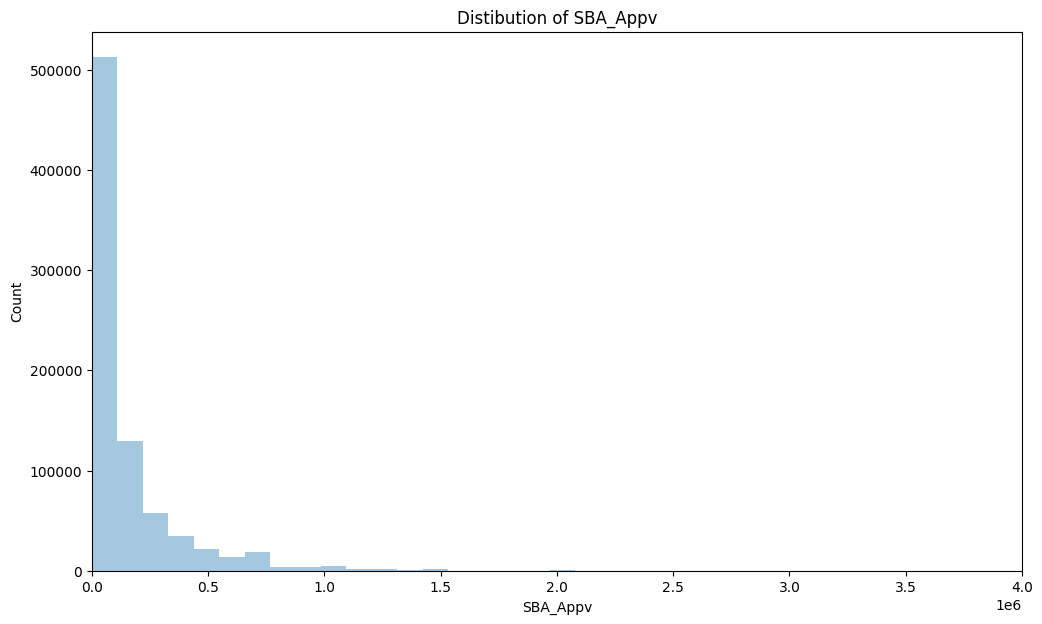

In [40]:
fig = plt.figure(figsize=(12,7))
sns.distplot(a=data['SBA_Appv'], kde=False, bins=50)
plt.title('Distibution of SBA_Appv')
plt.ylabel('Count')
plt.xlim(0, 4000000)
plt.show()

In [41]:
data['LargeSBA'] = 0
data['LargeSBA'].loc[data['SBA_Appv'] > 200000] = 1


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [42]:
data['LargeSBA'].value_counts()

0    628635
1    178815
Name: LargeSBA, dtype: int64

* EmpGrowth : The value of CreateJob - RetainedJob. If it's negative, we assumes it as 0

In [43]:
data['EmpGrowth'] = data['CreateJob'] - data['RetainedJob']

In [44]:
data['EmpGrowth'].loc[data['EmpGrowth'] < 0] = 0


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [45]:
data['EmpGrowth'].value_counts()

0       722636
1        14503
2        12809
3         8380
4         7031
         ...  
263          1
1027         1
5621         1
441          1
330          1
Name: EmpGrowth, Length: 245, dtype: int64

* LoanAmountRatio : Divide the DisbursementGross column by the SBA_Appv column to create a new column representing the ratio of the actual loan amount received to the SBA-guaranteed portion of the loan.

In [46]:
data['LoanAmountRatio'] = data['DisbursementGross'] / data['SBA_Appv']

In [47]:
data['LoanAmountRatio'].value_counts()

1.333333    145759
2.000000    143642
1.176471    103194
1.250000     69147
1.111111     65460
             ...  
2.427480         1
3.480057         1
4.005833         1
7.082733         1
4.912500         1
Name: LoanAmountRatio, Length: 135400, dtype: int64

* BigBank : If the bank is in US top 15 bank list [ JPMorgan Chase, Bank of America, Citigroup, Wells Fargo, U.S. Bancorp, PNC Financial Services, Truist Financial, Goldman Sachs, Capital One Financial, TD Group US Holdings, Bank of New York Mellon, State Street, Citizens Financial, First Republic Bank, Morgan Stanley Private Bank]

In [48]:
top_bank = [ 'JPMorgan Chase', 'Bank of America', 'Citigroup', 'Wells Fargo', 'U.S. Bancorp', 'PNC Financial Services', 'Truist Financial', 'Goldman Sachs', 'Capital One Financial', 'TD Group US Holdings', 'Bank of New York Mellon', 'State Street', 'Citizens Financial', 'First Republic Bank', 'Morgan Stanley Private Bank']

In [49]:
top_bank_initial = []
for name in top_bank:
    top_bank_initial.append(name[0:11])
top_bank_initial

['JPMorgan Ch',
 'Bank of Ame',
 'Citigroup',
 'Wells Fargo',
 'U.S. Bancor',
 'PNC Financi',
 'Truist Fina',
 'Goldman Sac',
 'Capital One',
 'TD Group US',
 'Bank of New',
 'State Stree',
 'Citizens Fi',
 'First Repub',
 'Morgan Stan']

In [50]:
top_bank_initial = list(map(str.lower, top_bank_initial))

In [51]:
top_bank_initial

['jpmorgan ch',
 'bank of ame',
 'citigroup',
 'wells fargo',
 'u.s. bancor',
 'pnc financi',
 'truist fina',
 'goldman sac',
 'capital one',
 'td group us',
 'bank of new',
 'state stree',
 'citizens fi',
 'first repub',
 'morgan stan']

In [52]:
data['Bank_init'] = data['Bank'].str.lower().str[:11]

In [53]:
data['BigBank'] = data['Bank_init'].apply(lambda x: 1 if x in top_bank_initial else 0)

In [54]:
data['BigBank'].value_counts()

0    605534
1    201916
Name: BigBank, dtype: int64

In [55]:
data

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,...,ZeroBal,SBAGrAppv,EntScale,GDPTopState,SameState,LargeSBA,EmpGrowth,LoanAmountRatio,Bank_init,BigBank
0,PRINCETON,MN,55371,PEOPLES BANK OF COMMERCE,MN,441120,4,2.0,0,0,...,1,0,Small,0,1,0,0,1.333329,peoples ban,0
1,Kansas city,MO,64116,BANK OF HAYS,KS,481111,14,1.0,0,14,...,1,0,Small,0,0,0,0,2.000000,bank of hay,0
2,BELLWOOD,PA,16617,FIRST COMMONWEALTH BANK,PA,334417,10,1.0,0,2,...,1,0,Small,0,1,0,0,2.000000,first commo,0
3,GRAND PRAIRIE,TX,75050,PROSPERITY BANK,TX,0,18,1.0,0,0,...,1,0,Small,0,1,0,0,1.176471,prosperity,0
4,EL PASO,TX,79925,WESTSTAR BANK,TX,423220,4,1.0,0,4,...,1,0,Small,0,1,0,0,2.000000,weststar ba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807445,GRAND FORKS,ND,58208,FRANDSEN BANK & TRUST,ND,0,41,1.0,0,0,...,1,0,Small,1,1,0,0,1.111111,frandsen ba,0
807446,ARLINGTON,TX,76016,JPMORGAN CHASE BANK NATL ASSOC,IL,561110,1,1.0,0,1,...,1,0,Small,0,0,0,0,6.445955,jpmorgan ch,1
807447,CINCINNATI,OH,45236,"PNC BANK, NATIONAL ASSOCIATION",DE,722211,3,1.0,3,0,...,1,0,Small,0,0,0,3,2.000000,"pnc bank, n",0
807448,MERIDEN,CT,6451,ION BANK,CT,561612,80,1.0,0,80,...,1,0,Medium,1,1,0,0,4.912500,ion bank,0


Drop columns that we don't need anymore

In [56]:
data.columns

Index(['City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'DisbursementGross', 'BalanceGross', 'GrAppv',
       'SBA_Appv', 'LoanInd', 'MIS_Status', 'IsFranchise', 'Industry',
       'ZeroBal', 'SBAGrAppv', 'EntScale', 'GDPTopState', 'SameState',
       'LargeSBA', 'EmpGrowth', 'LoanAmountRatio', 'Bank_init', 'BigBank'],
      dtype='object')

In [57]:
col_to_drop = ['NAICS', 'NewExist', 'FranchiseCode', 'Bank_init']

In [58]:
data_new = data.drop(columns = col_to_drop)
data_new

,City,State,Zip,Bank,BankState,NoEmp,CreateJob,RetainedJob,UrbanRural,RevLineCr,...,Industry,ZeroBal,SBAGrAppv,EntScale,GDPTopState,SameState,LargeSBA,EmpGrowth,LoanAmountRatio,BigBank
0,PRINCETON,MN,55371,PEOPLES BANK OF COMMERCE,MN,4,0,0,0,0,...,Retail_trade,1,0,Small,0,1,0,0,1.333329,0
1,Kansas city,MO,64116,BANK OF HAYS,KS,14,0,14,1,0,...,Trans/Ware,1,0,Small,0,0,0,0,2.000000,0
2,BELLWOOD,PA,16617,FIRST COMMONWEALTH BANK,PA,10,0,2,1,2,...,Manufacturing,1,0,Small,0,1,0,0,2.000000,0
3,GRAND PRAIRIE,TX,75050,PROSPERITY BANK,TX,18,0,0,0,0,...,Undefined,1,0,Small,0,1,0,0,1.176471,0
4,EL PASO,TX,79925,WESTSTAR BANK,TX,4,0,4,1,0,...,Wholesale_trade,1,0,Small,0,1,0,0,2.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807445,GRAND FORKS,ND,58208,FRANDSEN BANK & TRUST,ND,41,0,0,0,0,...,Undefined,1,0,Small,1,1,0,0,1.111111,0
807446,ARLINGTON,TX,76016,JPMORGAN CHASE BANK NATL ASSOC,IL,1,0,1,1,1,...,Admin_sup/Waste_Mgmt_Rem,1,0,Small,0,0,0,0,6.445955,1
807447,CINCINNATI,OH,45236,"PNC BANK, NATIONAL ASSOCIATION",DE,3,3,0,1,2,...,Accom/Food_serv,1,0,Small,0,0,0,3,2.000000,0
807448,MERIDEN,CT,6451,ION BANK,CT,80,0,80,1,1,...,Admin_sup/Waste_Mgmt_Rem,1,0,Medium,1,1,0,0,4.912500,0


In [59]:
data_new.shape

(807450, 28)

In [60]:
data_new.isnull().sum()

City                   26
State                  13
Zip                     0
Bank                 1347
BankState            1353
NoEmp                   0
CreateJob               0
RetainedJob             0
UrbanRural              0
RevLineCr               0
LowDoc                  0
DisbursementGross       0
BalanceGross            0
GrAppv                  0
SBA_Appv                0
LoanInd                 0
MIS_Status              0
IsFranchise             0
Industry                0
ZeroBal                 0
SBAGrAppv               0
EntScale                0
GDPTopState             0
SameState               0
LargeSBA                0
EmpGrowth               0
LoanAmountRatio         0
BigBank                 0
dtype: int64

In [61]:
data_new = data_new.reset_index(drop=True)

In [62]:
data_new.dtypes

City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NoEmp                  int64
CreateJob              int64
RetainedJob            int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
DisbursementGross    float64
BalanceGross         float64
GrAppv               float64
SBA_Appv             float64
LoanInd                int64
MIS_Status             int64
IsFranchise            int32
Industry              object
ZeroBal                int64
SBAGrAppv              int64
EntScale              object
GDPTopState            int64
SameState              int64
LargeSBA               int64
EmpGrowth              int64
LoanAmountRatio      float64
BigBank                int64
dtype: object

In [63]:
len(data_new.columns)

28

In [64]:
categorical_var = ['City', 'State', 'Zip', 'Bank', 'BankState', 'UrbanRural', 
                   'RevLineCr', 'LowDoc', 'LoanInd', 'IsFranchise', 'Industry', 
                   'ZeroBal', 'SBAGrAppv', 'EntScale', 'GDPTopState', 
                   'SameState', 'LargeSBA', 'BigBank']
numerical_var = []
for col in data_new.columns:
    if col not in categorical_var + ['MIS_Status']:
        numerical_var.append(col)
numerical_var

['NoEmp',
 'CreateJob',
 'RetainedJob',
 'DisbursementGross',
 'BalanceGross',
 'GrAppv',
 'SBA_Appv',
 'EmpGrowth',
 'LoanAmountRatio']

In [65]:
print(len(categorical_var))
print(len(numerical_var))

18
9


In [66]:
data_new[categorical_var] = data_new[categorical_var].astype(object)

In [67]:
data_new[categorical_var].dtypes

City           object
State          object
Zip            object
Bank           object
BankState      object
UrbanRural     object
RevLineCr      object
LowDoc         object
LoanInd        object
IsFranchise    object
Industry       object
ZeroBal        object
SBAGrAppv      object
EntScale       object
GDPTopState    object
SameState      object
LargeSBA       object
BigBank        object
dtype: object

In [68]:
data_new[numerical_var].dtypes

NoEmp                  int64
CreateJob              int64
RetainedJob            int64
DisbursementGross    float64
BalanceGross         float64
GrAppv               float64
SBA_Appv             float64
EmpGrowth              int64
LoanAmountRatio      float64
dtype: object

### Data Split & Encoding

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X = data_new.drop(columns=['MIS_Status'])
y = data_new[['MIS_Status']]

In [71]:
print(X.shape)
print(y.shape)

(807450, 27)
(807450, 1)


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [73]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(484470, 27)
(484470, 1)
(161490, 27)
(161490, 1)


In [74]:
values_to_fill = {}
for col in X_train.columns:
    if X_train[col].isna().sum() > 0:
        values_to_fill[col] = "Missing"

X_train.fillna(value=values_to_fill,inplace=True)
X_test.fillna(value=values_to_fill, inplace=True)

In [75]:
# No null values in test&training
print(X_train.isna().sum())
print(X_test.isna().sum())

City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NoEmp                0
CreateJob            0
RetainedJob          0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
BalanceGross         0
GrAppv               0
SBA_Appv             0
LoanInd              0
IsFranchise          0
Industry             0
ZeroBal              0
SBAGrAppv            0
EntScale             0
GDPTopState          0
SameState            0
LargeSBA             0
EmpGrowth            0
LoanAmountRatio      0
BigBank              0
dtype: int64
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NoEmp                0
CreateJob            0
RetainedJob          0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
BalanceGross         0
GrAppv               0
SBA_Appv             0
LoanInd              

In [76]:
# Specifying One-hot-encoding columns and target encoding/woe encoding columns
OHE_columns = []
TE_columns = []
for col in data_new[categorical_var].columns:
    if data_new[col].nunique() < 10:
        OHE_columns.append(col)
    else:
        TE_columns.append(col)

In [77]:
print(OHE_columns)
print(TE_columns)

['UrbanRural', 'RevLineCr', 'LowDoc', 'IsFranchise', 'ZeroBal', 'SBAGrAppv', 'EntScale', 'GDPTopState', 'SameState', 'LargeSBA', 'BigBank']
['City', 'State', 'Zip', 'Bank', 'BankState', 'LoanInd', 'Industry']


In [78]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import category_encoders as ce
from copy import deepcopy

In [79]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)

In [80]:
X_train.head()

,City,State,Zip,Bank,BankState,NoEmp,CreateJob,RetainedJob,UrbanRural,RevLineCr,...,Industry,ZeroBal,SBAGrAppv,EntScale,GDPTopState,SameState,LargeSBA,EmpGrowth,LoanAmountRatio,BigBank
0,RACINE,WI,53406,U.S. BANK NATIONAL ASSOCIATION,WI,1,0,0,0,0,...,Undefined,1,0,Small,0,1,1,0,1.176471,0
1,NORTH LAS VEGAS,NV,89030,GE CAP. SMALL BUS. FINAN CORP,TX,5,0,0,0,2,...,Undefined,1,0,Small,0,0,1,0,1.333333,0
2,Studio City,CA,91602,BANK OF AMERICA NATL ASSOC,NC,2,0,2,1,1,...,Prof/Science/Tech,1,0,Small,1,0,0,0,4.637667,1
3,UPPER MONTCLAIR,NJ,7043,BANCO POPULAR NORTH AMERICA,NY,2,2,2,1,2,...,Trans/Ware,1,0,Small,0,0,0,0,1.333333,0
4,COCKEYSVILLE,MD,21030,"READYCAP LENDING, LLC",CA,15,0,0,0,0,...,Undefined,1,0,Small,0,0,0,0,1.250000,0


### One-hot-encoding: columns that has less than 10 unique values

In [81]:
# One-hot-encoding
#Columns to drop from ML models
cols_to_drop = []
#Categorical encoders disctionary
cat_encoders = {}
#New categorical (encoded) columns
OHE_enc_columns = []
for col in OHE_columns:
    print("One-hot encoding of ", col)
    enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
    enc.fit(X_train[[col]])
    result = enc.transform(X_train[[col]])
    ohe_columns = [col+"_"+str(x) for x in enc.categories_[0]]
    OHE_enc_columns = OHE_enc_columns + ohe_columns 
    result_train = pd.DataFrame(result, columns=ohe_columns)
    X_train = pd.concat([X_train, result_train], axis=1)
    '''Encode Testing'''
    result = enc.transform(X_test[[col]])
    result_test = pd.DataFrame(result, columns=ohe_columns)
    X_test = pd.concat([X_test, result_test], axis=1)
    result = enc.transform(X_val[[col]])
    result_val = pd.DataFrame(result, columns=ohe_columns)
    X_val = pd.concat([X_val, result_val], axis=1)
    cat_encoders[col] = [deepcopy(enc),"ohe"] 

One-hot encoding of  UrbanRural


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


One-hot encoding of  RevLineCr


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


One-hot encoding of  LowDoc


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


One-hot encoding of  IsFranchise


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


One-hot encoding of  ZeroBal


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


One-hot encoding of  SBAGrAppv


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


One-hot encoding of  EntScale


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


One-hot encoding of  GDPTopState


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


One-hot encoding of  SameState


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


One-hot encoding of  LargeSBA


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


One-hot encoding of  BigBank


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


### Target encoding 

In [82]:
# Target encoding
orig_categorical_columns = TE_columns

target_encoder = ce.TargetEncoder(cols=orig_categorical_columns, min_samples_leaf=20, smoothing=10)
target_encoder.fit(X_train[orig_categorical_columns],y_train)
X_train_target_enc = target_encoder.transform(X_train[orig_categorical_columns])
X_test_target_enc = target_encoder.transform(X_test[orig_categorical_columns])
X_val_target_enc = target_encoder.transform(X_val[orig_categorical_columns])

In [83]:
te_columns = []

for col in orig_categorical_columns:
    X_train[col+"_trg"] = X_train_target_enc[col]
    X_test[col+"_trg"] = X_test_target_enc[col]
    X_val[col+"_trg"] = X_val_target_enc[col]
    te_columns.append(col+"_trg")

cat_encoders[("orig_categorical_columns","te")] = [deepcopy(target_encoder),"te"]

In [84]:
X_train.head()

,City,State,Zip,Bank,BankState,NoEmp,CreateJob,RetainedJob,UrbanRural,RevLineCr,...,LargeSBA_1,BigBank_0,BigBank_1,City_trg,State_trg,Zip_trg,Bank_trg,BankState_trg,LoanInd_trg,Industry_trg
0,RACINE,WI,53406,U.S. BANK NATIONAL ASSOCIATION,WI,1,0,0,0,0,...,1.0,1.0,0.0,0.131579,0.122265,0.214733,0.177129,0.118851,0.176257,0.083824
1,NORTH LAS VEGAS,NV,89030,GE CAP. SMALL BUS. FINAN CORP,TX,5,0,0,0,2,...,1.0,1.0,0.0,0.222930,0.230608,0.105693,0.152076,0.139779,0.175437,0.083824
2,Studio City,CA,91602,BANK OF AMERICA NATL ASSOC,NC,2,0,2,1,1,...,0.0,0.0,1.0,0.188184,0.185413,0.279977,0.275376,0.294005,0.175437,0.189793
3,UPPER MONTCLAIR,NJ,7043,BANCO POPULAR NORTH AMERICA,NY,2,2,2,1,2,...,0.0,1.0,0.0,0.180136,0.202899,0.210046,0.426920,0.170386,0.172983,0.261359
4,COCKEYSVILLE,MD,21030,"READYCAP LENDING, LLC",CA,15,0,0,0,0,...,0.0,1.0,0.0,0.079421,0.195388,0.077356,0.262183,0.219544,0.179872,0.083824


### Standard Scaler

In [85]:
numerical_var

['NoEmp',
 'CreateJob',
 'RetainedJob',
 'DisbursementGross',
 'BalanceGross',
 'GrAppv',
 'SBA_Appv',
 'EmpGrowth',
 'LoanAmountRatio']

In [86]:
from sklearn.preprocessing import StandardScaler
num_scalers = {}
cols_numerical_sc = []
'''Scale only original numerical columns'''
cols_numerical_orig = numerical_var
for col in cols_numerical_orig:
    print("StandardScaler scale of ", col)
    scaler = StandardScaler()
    scaler.fit(X_train[[col]])
    X_train[col+"_sc"] = scaler.transform(X_train[[col]])
    X_test[col+"_sc"] = scaler.transform(X_test[[col]])
    X_val[col+"_sc"] = scaler.transform(X_test[[col]])

    num_scalers[col] = [deepcopy(scaler),"StandardScaler"]
    cols_numerical_sc.append(col+"_sc")
    cols_to_drop.append(col)

StandardScaler scale of  NoEmp
StandardScaler scale of  CreateJob
StandardScaler scale of  RetainedJob
StandardScaler scale of  DisbursementGross
StandardScaler scale of  BalanceGross
StandardScaler scale of  GrAppv
StandardScaler scale of  SBA_Appv
StandardScaler scale of  EmpGrowth
StandardScaler scale of  LoanAmountRatio


In [87]:
X_train.head()

,City,State,Zip,Bank,BankState,NoEmp,CreateJob,RetainedJob,UrbanRural,RevLineCr,...,Industry_trg,NoEmp_sc,CreateJob_sc,RetainedJob_sc,DisbursementGross_sc,BalanceGross_sc,GrAppv_sc,SBA_Appv_sc,EmpGrowth_sc,LoanAmountRatio_sc
0,RACINE,WI,53406,U.S. BANK NATIONAL ASSOCIATION,WI,1,0,0,0,0,...,0.083824,-0.150146,-0.035835,-0.045734,0.170162,-0.002377,0.202458,0.275990,-0.071013,-0.492770
1,NORTH LAS VEGAS,NV,89030,GE CAP. SMALL BUS. FINAN CORP,TX,5,0,0,0,2,...,0.083824,-0.091721,-0.035835,-0.045734,0.696315,-0.002377,0.735340,0.661647,-0.071013,-0.382800
2,Studio City,CA,91602,BANK OF AMERICA NATL ASSOC,NC,2,0,2,1,1,...,0.189793,-0.135540,-0.035835,-0.037412,-0.655205,-0.002377,-0.661485,-0.643442,-0.071013,1.933732
3,UPPER MONTCLAIR,NJ,7043,BANCO POPULAR NORTH AMERICA,NY,2,2,2,1,2,...,0.261359,-0.135540,-0.027489,-0.037412,0.051297,-0.002377,0.082072,0.054361,-0.071013,-0.382800
4,COCKEYSVILLE,MD,21030,"READYCAP LENDING, LLC",CA,15,0,0,0,0,...,0.083824,0.054342,-0.035835,-0.045734,-0.354242,-0.002377,-0.328654,-0.305513,-0.071013,-0.441221


In [88]:
print("Original numerical columns:",cols_numerical_orig)
print("Scaled numerical columns:",cols_numerical_sc)

Original numerical columns: ['NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv', 'EmpGrowth', 'LoanAmountRatio']
Scaled numerical columns: ['NoEmp_sc', 'CreateJob_sc', 'RetainedJob_sc', 'DisbursementGross_sc', 'BalanceGross_sc', 'GrAppv_sc', 'SBA_Appv_sc', 'EmpGrowth_sc', 'LoanAmountRatio_sc']


In [89]:
OHE_enc_columns

['UrbanRural_0',
 'UrbanRural_1',
 'UrbanRural_2',
 'RevLineCr_0',
 'RevLineCr_1',
 'RevLineCr_2',
 'LowDoc_0',
 'LowDoc_1',
 'LowDoc_2',
 'IsFranchise_0',
 'IsFranchise_1',
 'ZeroBal_0',
 'ZeroBal_1',
 'SBAGrAppv_0',
 'SBAGrAppv_1',
 'EntScale_Large',
 'EntScale_Medium',
 'EntScale_Small',
 'GDPTopState_0',
 'GDPTopState_1',
 'SameState_0',
 'SameState_1',
 'LargeSBA_0',
 'LargeSBA_1',
 'BigBank_0',
 'BigBank_1']

In [90]:
te_columns

['City_trg',
 'State_trg',
 'Zip_trg',
 'Bank_trg',
 'BankState_trg',
 'LoanInd_trg',
 'Industry_trg']

In [91]:
cols_numerical_sc

['NoEmp_sc',
 'CreateJob_sc',
 'RetainedJob_sc',
 'DisbursementGross_sc',
 'BalanceGross_sc',
 'GrAppv_sc',
 'SBA_Appv_sc',
 'EmpGrowth_sc',
 'LoanAmountRatio_sc']

In [92]:
y_train = y_train.astype(object)
y_test = y_test.astype(object)
y_val = y_val.astype(object)

In [93]:
y_train.dtypes

MIS_Status    object
dtype: object

### Final dataset to use

In [94]:
# Dataset with Target encoded columns
X_train_trg = X_train[cols_numerical_sc+OHE_enc_columns+te_columns]
X_test_trg = X_test[cols_numerical_sc+OHE_enc_columns+te_columns]
X_val_trg = X_val[cols_numerical_sc+OHE_enc_columns+te_columns]

In [95]:
X_train_trg.head()

,NoEmp_sc,CreateJob_sc,RetainedJob_sc,DisbursementGross_sc,BalanceGross_sc,GrAppv_sc,SBA_Appv_sc,EmpGrowth_sc,LoanAmountRatio_sc,UrbanRural_0,...,LargeSBA_1,BigBank_0,BigBank_1,City_trg,State_trg,Zip_trg,Bank_trg,BankState_trg,LoanInd_trg,Industry_trg
0,-0.150146,-0.035835,-0.045734,0.170162,-0.002377,0.202458,0.275990,-0.071013,-0.492770,1.0,...,1.0,1.0,0.0,0.131579,0.122265,0.214733,0.177129,0.118851,0.176257,0.083824
1,-0.091721,-0.035835,-0.045734,0.696315,-0.002377,0.735340,0.661647,-0.071013,-0.382800,1.0,...,1.0,1.0,0.0,0.222930,0.230608,0.105693,0.152076,0.139779,0.175437,0.083824
2,-0.135540,-0.035835,-0.037412,-0.655205,-0.002377,-0.661485,-0.643442,-0.071013,1.933732,0.0,...,0.0,0.0,1.0,0.188184,0.185413,0.279977,0.275376,0.294005,0.175437,0.189793
3,-0.135540,-0.027489,-0.037412,0.051297,-0.002377,0.082072,0.054361,-0.071013,-0.382800,0.0,...,0.0,1.0,0.0,0.180136,0.202899,0.210046,0.426920,0.170386,0.172983,0.261359
4,0.054342,-0.035835,-0.045734,-0.354242,-0.002377,-0.328654,-0.305513,-0.071013,-0.441221,1.0,...,0.0,1.0,0.0,0.079421,0.195388,0.077356,0.262183,0.219544,0.179872,0.083824


In [96]:
X_train_trg.columns

Index(['NoEmp_sc', 'CreateJob_sc', 'RetainedJob_sc', 'DisbursementGross_sc',
       'BalanceGross_sc', 'GrAppv_sc', 'SBA_Appv_sc', 'EmpGrowth_sc',
       'LoanAmountRatio_sc', 'UrbanRural_0', 'UrbanRural_1', 'UrbanRural_2',
       'RevLineCr_0', 'RevLineCr_1', 'RevLineCr_2', 'LowDoc_0', 'LowDoc_1',
       'LowDoc_2', 'IsFranchise_0', 'IsFranchise_1', 'ZeroBal_0', 'ZeroBal_1',
       'SBAGrAppv_0', 'SBAGrAppv_1', 'EntScale_Large', 'EntScale_Medium',
       'EntScale_Small', 'GDPTopState_0', 'GDPTopState_1', 'SameState_0',
       'SameState_1', 'LargeSBA_0', 'LargeSBA_1', 'BigBank_0', 'BigBank_1',
       'City_trg', 'State_trg', 'Zip_trg', 'Bank_trg', 'BankState_trg',
       'LoanInd_trg', 'Industry_trg'],
      dtype='object')

In [97]:
print(len(X_train_trg.columns))

42


### Saving final data

In [98]:
train = pd.concat([X_train_trg, y_train], axis=1)
valid = pd.concat([X_val_trg, y_val], axis=1)
test = pd.concat([X_test_trg, y_test], axis=1)

In [99]:
data_new_whole = pd.concat([train, valid, test], axis=0)

In [100]:
data_new_whole.shape

(807450, 43)

In [101]:
data_new = data_new_whole.sample(frac=0.05, random_state=1)

In [102]:
data_new.shape

(40372, 43)

In [103]:
# Whole dataset to be used after choosing a better model
data_new_whole.to_csv('D:\AML\Project2\\data_new_whole.csv', index=False)

# Sample dataset which is 5% of the whole dataset to be used in experiment
data_new.to_csv('D:\AML\Project2\\data_new.csv', index=False)

## Models

You will need to train and tune two types of models:
- GBM (H2O)
- LightGBM. To install LightGBM, run following command from your terminal after activating class virtual environment:  `pip install lightgbm==3.3.5` 


You will train and tune 2 models for each task for the total of 2 final models. 


First, split he dataset to Train/Validation/Test, before applying any encodings clean-up or feature engineering. 
It is important to understand all the steps before model training, so that you can reliably replicate and test them to produce scoring function.


In [119]:
import h2o
try:
    h2o.init()
    h2o.cluster().shutdown()
except:
    pass 
h2o.init(nthreads=8, max_mem_size=8)
h2o.remove_all() 

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.341-b10, mixed mode)
  Starting server from C:\Users\차유경\OneDrive\UTD\2023 Spring\Applied Machine Learning\ml-spring-2023\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: D:\tmph7xa43nf
  JVM stdout: D:\tmph7xa43nf\h2o_차유경_started_from_python.out
  JVM stderr: D:\tmph7xa43nf\h2o_차유경_started_from_python.err
Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,17 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.4
H2O_cluster_version_age:,4 months and 2 days !!!
H2O_cluster_name:,H2O_from_python_李⑥쑀寃�_fxdcp8
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.710 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [120]:
import numpy as np
import math
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

### GBM

In [121]:
#df = h2o.import_file(path = "D:\AML\Project2\\data_new.csv")
#After running code with above sample dataset, I confirmed everything works fine, so I'm using the whole dataset.
df = h2o.import_file(path = "D:\AML\Project2\\data_new_whole.csv")
print(df.dim)
print(df.head)
print(df.tail)
print(df.describe)

## pick a response for the supervised problem
response = "MIS_Status"

## the response variable is an integer, we will turn it into a categorical/factor for binary classification
df[response] = df[response].asfactor()           

## use all other columns (except for the name & the response column ("survived")) as predictors
predictors = df.drop(response).columns
print(predictors)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
[807450, 43]
<bound method H2OFrame.head of H2OFrame({'_ex': <Expr()#data_new_whole.hex>})>
<bound method H2OFrame.tail of H2OFrame({'_ex': <Expr()#data_new_whole.hex>})>
<bound method H2OFrame.describe of H2OFrame({'_ex': <Expr()#data_new_whole.hex>})>
['NoEmp_sc', 'CreateJob_sc', 'RetainedJob_sc', 'DisbursementGross_sc', 'BalanceGross_sc', 'GrAppv_sc', 'SBA_Appv_sc', 'EmpGrowth_sc', 'LoanAmountRatio_sc', 'UrbanRural_0', 'UrbanRural_1', 'UrbanRural_2', 'RevLineCr_0', 'RevLineCr_1', 'RevLineCr_2', 'LowDoc_0', 'LowDoc_1', 'LowDoc_2', 'IsFranchise_0', 'IsFranchise_1', 'ZeroBal_0', 'ZeroBal_1', 'SBAGrAppv_0', 'SBAGrAppv_1', 'EntScale_Large', 'EntScale_Medium', 'EntScale_Small', 'GDPTopState_0', 'GDPTopState_1', 'SameState_0', 'SameState_1', 'LargeSBA_0', 'LargeSBA_1', 'BigBank_0', 'BigBank_1', 'City_trg', 'State_trg', 'Zip_trg', 'Bank_trg', 'BankState_trg', 'LoanInd_trg', 'Industry_trg']


In [122]:
train, valid, test = df.split_frame(
    ratios=[0.6,0.2], 
    seed=1234, 
    destination_frames=['train','valid','test']
)

In [230]:
# Baseline
gbm = H2OGradientBoostingEstimator()
gbm.train(x=predictors, y=response, training_frame=train)

print(gbm)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1683424268951_6750


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          22774                  5            5            5             26            32            31.58

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.11290081654850184
RMSE: 0.33600716740644365
LogLoss: 0.36451269327216396
Mean Per-Class Error: 0.2810814674655794
AUC: 0.8116478784450016
AUCPR: 0.5203995866999687
Gini: 0.6232957568900033

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2

In [231]:
# Get the result on the validation set
perf = gbm.model_performance(valid)
print(perf.auc())

0.807247322525293


In [232]:
hyper_params = {'max_depth' : list(range(1,20,2))}

#Build initial GBM Model
gbm_grid = H2OGradientBoostingEstimator(
        ntrees=10000,
        learn_rate=0.05,
        learn_rate_annealing = 0.99,
        sample_rate = 0.8,
        col_sample_rate = 0.8,
        seed = 1234,
        score_tree_interval = 10, 
        stopping_rounds = 5,
        stopping_metric = "AUC",
        stopping_tolerance = 1e-4)

#Build grid search with previously made GBM and hyper parameters
grid = H2OGridSearch(gbm_grid,hyper_params,
                         grid_id = 'depth_grid',
                         search_criteria = {'strategy': "Cartesian"})


#Train grid search
grid.train(x=predictors, 
           y=response,
           training_frame = train,
           validation_frame = valid)

print(grid)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Errors/Warnings building gridsearch model

Hyper-parameter: max_depth, 15
failure_details: Illegal argument(s) for GBM model: depth_grid_model_18.  Details: ERRR on field: _ntrees: The tree model will not fit in the driver node's memory (72.7 KB per tree x 10000 > 701.6 MB) - try decreasing ntrees and/or max_depth or increasing min_rows!

failure_stack_traces: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: depth_grid_model_18.  Details: ERRR on field: _ntrees: The tree model will not fit in the driver node's memory (72.7 KB per tree x 10000 > 701.6 MB) - try decreasing ntrees and/or max_depth or increasing min_rows!

	at water.exceptions.H2OModelBuilderIllegalArgumentException.makeFromBuilder(H2OModelBuilderIllegalArgumentException.java:19)
	at hex.tree.SharedTree.doScoringAndSaveModel(SharedTree.java:816)
	at hex.tree.SharedTree$Driver.scoreAndBu

In [233]:
## sort the grid models by decreasing AUC
sorted_grid = grid.get_grid(sort_by='auc',decreasing=True)
print(sorted_grid)

Hyper-Parameter Search Summary: ordered by decreasing auc
    max_depth    model_ids            auc
--  -----------  -------------------  --------
    13           depth_grid_model_17  0.832383
    11           depth_grid_model_16  0.830143
    9            depth_grid_model_15  0.825615
    7            depth_grid_model_14  0.817712
    7            depth_grid_model_4   0.807073
    5            depth_grid_model_13  0.806508
    9            depth_grid_model_5   0.805977
    5            depth_grid_model_3   0.804616
    11           depth_grid_model_6   0.801997
    13           depth_grid_model_7   0.800759
    17           depth_grid_model_9   0.798652
    15           depth_grid_model_8   0.798492
    19           depth_grid_model_10  0.796976
    3            depth_grid_model_2   0.795148
    3            depth_grid_model_12  0.791497
    1            depth_grid_model_1   0.780499
    1            depth_grid_model_11  0.773847


In [234]:
max_depths = sorted_grid.sorted_metric_table()['max_depth'][0:5]
new_max = int(max(max_depths, key=int))
new_min = int(min(max_depths, key=int))

print("MaxDepth", new_max)
print("MinDepth", new_min)

MaxDepth 13
MinDepth 7


In [235]:
# create hyperameter and search criteria lists 
hyper_params_tune = {'max_depth' : list(range(new_min,new_max+1,1)),
                'sample_rate': [x/100. for x in range(20,101)],
                'col_sample_rate' : [x/100. for x in range(20,101)],
                'col_sample_rate_per_tree': [x/100. for x in range(20,101)],
                'col_sample_rate_change_per_level': [x/100. for x in range(90,111)],
                'min_rows': [2**x for x in range(0,int(math.log(train.nrow,2)-1)+1)],
                'nbins': [2**x for x in range(4,11)],
                'nbins_cats': [2**x for x in range(4,13)],
                'min_split_improvement': [0,1e-8,1e-6,1e-4],
                'histogram_type': ["UniformAdaptive","QuantilesGlobal","RoundRobin"]}
search_criteria_tune = {'strategy': "RandomDiscrete",
                   'max_runtime_secs': 3600,  
                   'max_models': 100,
                   'seed' : 1234,
                   'stopping_rounds' : 5,
                   'stopping_metric' : "AUC",
                   'stopping_tolerance': 1e-3
                   }

In [236]:
gbm_final_grid = H2OGradientBoostingEstimator(distribution='bernoulli',
                    ntrees=10000,
                    learn_rate=0.05,
                    learn_rate_annealing = 0.99,
                    score_tree_interval = 10,
                    seed = 1234,
                    stopping_rounds = 5,
                    stopping_metric = "AUC",
                    stopping_tolerance = 1e-4)
            
#Build grid search with previously made GBM and hyper parameters
final_grid = H2OGridSearch(gbm_final_grid, hyper_params = hyper_params_tune,
                                    grid_id = 'final_grid',
                                    search_criteria = search_criteria_tune)
#Train grid search
final_grid.train(x=predictors, 
           y=response,
           max_runtime_secs = 3600, 
           training_frame = train,
           validation_frame = valid)

print(final_grid)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Hyper-Parameter Search Summary: ordered by increasing logloss
     col_sample_rate    col_sample_rate_change_per_level    col_sample_rate_per_tree    histogram_type    max_depth    min_rows    min_split_improvement    nbins    nbins_cats    sample_rate    model_ids            logloss
---  -----------------  ----------------------------------  --------------------------  ----------------  -----------  ----------  -----------------------  -------  ------------  -------------  -------------------  -------------------
     0.63               0.94                                0.6                         UniformAdaptive   12.0         32.0        1e-06                    256.0    256.0         0.73           final_grid_model_43  0.36237489078978413
     0.31               0.99                                0.55                        UniformAdaptive   11.0         16.0        1e-06              

In [237]:
## Sort the grid models by AUC
sorted_final_grid = final_grid.get_grid(sort_by='auc',decreasing=True)

print(sorted_final_grid)

Hyper-Parameter Search Summary: ordered by decreasing auc
     col_sample_rate    col_sample_rate_change_per_level    col_sample_rate_per_tree    histogram_type    max_depth    min_rows    min_split_improvement    nbins    nbins_cats    sample_rate    model_ids            auc
---  -----------------  ----------------------------------  --------------------------  ----------------  -----------  ----------  -----------------------  -------  ------------  -------------  -------------------  ------------------
     0.49               0.92                                0.61                        UniformAdaptive   13.0         128.0       1e-08                    1024.0   128.0         0.72           final_grid_model_1   0.8081576127889337
     0.63               0.94                                0.6                         UniformAdaptive   12.0         32.0        1e-06                    256.0    256.0         0.73           final_grid_model_43  0.8081522027389705
     0.77            

### Result on Test set

In [238]:
#Get the best model from the list (the model name listed at the top of the table)
best_model = h2o.get_model(sorted_final_grid.sorted_metric_table()['model_ids'][0])
performance_best_model = best_model.model_performance(test)
print("Best Grid Model AUC on Test:",performance_best_model.auc())
print("Best Grid Model AUC on Validation:",best_model.model_performance(valid).auc())
print("Best accuracy threshold:",performance_best_model.accuracy()[0][0],"\n",
      " Accuracy:",
      performance_best_model.accuracy()[0][1])
print("Best F1 threshold:",performance_best_model.F1()[0][0],"\n",
      " F1:",
      performance_best_model.F1()[0][1])
performance_best_model.confusion_matrix()

Best Grid Model AUC on Test: 0.8064044460902504
Best Grid Model AUC on Validation: 0.8058222997213713
Best accuracy threshold: 0.49566039092363023 
  Accuracy: 0.8455334487272547
Best F1 threshold: 0.26470375209273395 
  F1: 0.5068900892955571


,0,1,Error,Rate
0,113783.0,19165.0,0.1442,(19165.0/132948.0)
1,12146.0,16093.0,0.4301,(12146.0/28239.0)
Total,125929.0,35258.0,0.1943,(31311.0/161187.0)


In [239]:
params_list = []
for key, value in best_model.params.items():
    params_list.append(str(key)+" = "+str(value['actual']))
params_list

["model_id = {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'final_grid_model_1', 'type': 'Key<Model>', 'URL': '/3/Models/final_grid_model_1'}",
 "training_frame = {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'train', 'type': 'Key<Frame>', 'URL': '/3/Frames/train'}",
 "validation_frame = {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'valid', 'type': 'Key<Frame>', 'URL': '/3/Frames/valid'}",
 'nfolds = 0',
 'keep_cross_validation_models = True',
 'keep_cross_validation_predictions = False',
 'keep_cross_validation_fold_assignment = False',
 'score_each_iteration = False',
 'score_tree_interval = 10',
 'fold_assignment = None',
 'fold_column = None',
 "response_column = {'__meta': {'schema_version': 3, 'schema_name': 'ColSpecifierV3', 'schema_type': 'VecSpecifier'}, 'column_name': 'MIS_Status', 'is_member_of_frames': None}",
 'i

In [240]:
gbm = h2o.get_model(sorted_final_grid.sorted_metric_table()['model_ids'][0])
#get the parameters from the Random grid search model and modify them slightly
params = gbm.params
new_params = {"nfolds":5, "model_id":None, "training_frame":None, "validation_frame":None, 
              "response_column":None, "ignored_columns":None}
for key in new_params.keys():
    params[key]['actual'] = new_params[key] 
gbm_best = H2OGradientBoostingEstimator()

# Set parameters for the new Model to be trained on full dataset
for key in params.keys():
    if key in dir(gbm_best) and getattr(gbm_best,key) != params[key]['actual']:
        setattr(gbm_best,key,params[key]['actual']) 

In [241]:
gbm_best.train(x=predictors, y=response, training_frame=df)
gbm_best.summary()

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,442.0,442.0,4212254.0,13.0,13.0,13.0,303.0,1623.0,753.3077


In [242]:
print(gbm_best.cross_validation_metrics_summary())

Cross-Validation Metrics Summary: 
                         mean      sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
-----------------------  --------  -----------  ------------  ------------  ------------  ------------  ------------
accuracy                 0.818736  0.00346775   0.817263      0.818812      0.816214      0.824688      0.816703
auc                      0.83251   0.00177671   0.83099       0.834804      0.83254       0.83057       0.833647
err                      0.181264  0.00346775   0.182737      0.181188      0.183786      0.175312      0.183297
err_count                29272.8   591.661      29496         29262         29700         28259         29647
f0point5                 0.506573  0.00605336   0.505741      0.510832      0.497929      0.513621      0.504741
f1                       0.538689  0.00418767   0.537042      0.544985      0.535531      0.535053      0.540834
f2                       0.575324  0.010475     0.572473  

In [243]:
#Get the best model from the list (the model name listed at the top of the table)
performance_best_model_whole = gbm_best.model_performance(test)
print("Best Grid Model AUC on Test:",performance_best_model_whole.auc())
print("Best Grid Model AUC on Validation:",gbm_best.model_performance(valid).auc())
print("Best accuracy threshold:",performance_best_model_whole.accuracy()[0][0],"\n",
      " Accuracy:",
      performance_best_model_whole.accuracy()[0][1])
print("Best F1 threshold:",performance_best_model_whole.F1()[0][0],"\n",
      " F1:",
      performance_best_model_whole.F1()[0][1])
performance_best_model_whole.confusion_matrix()

Best Grid Model AUC on Test: 0.8541943810835454
Best Grid Model AUC on Validation: 0.8534516171772554
Best accuracy threshold: 0.45053351382622037 
  Accuracy: 0.8601438081234839
Best F1 threshold: 0.2709659009491075 
  F1: 0.56442907469054


,0,1,Error,Rate
0,116769.0,16179.0,0.1217,(16179.0/132948.0)
1,10775.0,17464.0,0.3816,(10775.0/28239.0)
Total,127544.0,33643.0,0.1672,(26954.0/161187.0)


### LightGBM

In [2]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

In [3]:
data_new = import_data('D:\AML\Project2\data_new.csv')

Memory usage of dataframe is 13.24 MB
Memory usage after optimization is: 3.27 MB
Decreased by 75.3%


In [4]:
pd.set_option('display.max_columns', None)
data_new.head()

,NoEmp_sc,CreateJob_sc,RetainedJob_sc,DisbursementGross_sc,BalanceGross_sc,GrAppv_sc,SBA_Appv_sc,EmpGrowth_sc,LoanAmountRatio_sc,UrbanRural_0,UrbanRural_1,UrbanRural_2,RevLineCr_0,RevLineCr_1,RevLineCr_2,LowDoc_0,LowDoc_1,LowDoc_2,IsFranchise_0,IsFranchise_1,ZeroBal_0,ZeroBal_1,SBAGrAppv_0,SBAGrAppv_1,EntScale_Large,EntScale_Medium,EntScale_Small,GDPTopState_0,GDPTopState_1,SameState_0,SameState_1,LargeSBA_0,LargeSBA_1,BigBank_0,BigBank_1,City_trg,State_trg,Zip_trg,Bank_trg,BankState_trg,LoanInd_trg,Industry_trg,MIS_Status
0,0.331787,-0.035828,-0.045746,0.236572,-0.002377,0.269775,0.523926,-0.070984,-0.616699,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.203735,0.185425,0.119751,5.960464e-08,0.219604,0.177246,0.083801,0
1,-0.091736,-0.019150,-0.045746,-0.214355,-0.002377,-0.187012,-0.042206,0.203857,-0.616699,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.164185,0.143677,0.179810,0.000000e+00,0.104187,0.175415,0.189819,0
2,-0.106323,-0.027496,-0.029099,-0.216797,-0.002377,-0.417236,-0.491943,-0.070984,1.287109,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.229004,0.220703,0.183472,1.045532e-01,0.085999,0.174805,0.236206,0
3,-0.091736,-0.035828,-0.024933,-0.486328,-0.002377,-0.505859,-0.546875,-0.070984,0.427979,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.332031,0.276855,0.260986,2.753906e-01,0.293945,0.178711,0.229614,1
4,-0.077087,-0.035828,-0.045746,-0.528809,-0.002377,-0.505859,-0.480957,-0.070984,-0.441162,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.197510,0.199219,0.200073,2.753906e-01,0.293945,0.177246,0.229614,0


In [5]:
x_columns = list(data_new.columns)
response_column = 'MIS_Status'
x_columns.remove(response_column)

In [6]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40372 entries, 0 to 40371
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NoEmp_sc              40372 non-null  float16
 1   CreateJob_sc          40372 non-null  float16
 2   RetainedJob_sc        40372 non-null  float16
 3   DisbursementGross_sc  40372 non-null  float16
 4   BalanceGross_sc       40372 non-null  float16
 5   GrAppv_sc             40372 non-null  float16
 6   SBA_Appv_sc           40372 non-null  float16
 7   EmpGrowth_sc          40372 non-null  float16
 8   LoanAmountRatio_sc    40372 non-null  float16
 9   UrbanRural_0          40372 non-null  float16
 10  UrbanRural_1          40372 non-null  float16
 11  UrbanRural_2          40372 non-null  float16
 12  RevLineCr_0           40372 non-null  float16
 13  RevLineCr_1           40372 non-null  float16
 14  RevLineCr_2           40372 non-null  float16
 15  LowDoc_0           

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_new[x_columns], 
                                                    data_new[response_column], 
                                                    test_size=0.20, 
                                                    random_state=314, 
                                                    stratify=data_new[response_column])

In [8]:
print("Train dimensions:",X_train.shape)
print("Test dimensions:",X_test.shape)

Train dimensions: (32297, 42)
Test dimensions: (8075, 42)


In [9]:
import lightgbm as lgb

In [10]:
train_data = lgb.Dataset(data=X_train, label=y_train, params={"verbose":-1})
test_data = lgb.Dataset(data=X_test, label=y_test, params={"verbose":-1})
lgb_clf = lgb.train(params={"verbose":-1},
                    train_set=train_data)

In [11]:
from sklearn.metrics import roc_auc_score
print("AUC score on Test dataset:", roc_auc_score(y_test, lgb_clf.predict(X_test)))
print("AUC score on Train dataset:", roc_auc_score(y_train, lgb_clf.predict(X_train)))

AUC score on Test dataset: 0.8088168297753009
AUC score on Train dataset: 0.8682859357411034


#### Hyper-parameters tuning

In [12]:
#pip install optuna

In [13]:
from optuna.integration import LightGBMPruningCallback
import tqdm as notebook_tqdm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import optuna
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
study_model_iteractions = {}

def objective(trial, X, y):
    param_grid = {
        "num_iterations": 10000,
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, step=0.05),
        "num_leaves": trial.suggest_int("num_leaves", 50, 150, step=5),
        "max_depth": trial.suggest_int("max_depth", 5, 20, step=2),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 100, 1000, step=100),
        ##############################
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        ########################
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.8, 1.0, step=0.1),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [5]),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.8, 1.0, step=0.1),
        #######################
        "is_unbalance": trial.suggest_categorical("is_unbalance",[True, False]),
        ########################
        "verbose": -1,
        "objective":"binary",
        "metric":"auc"
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)

    cv_scores = np.empty(5)
    cv_iteractions = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_valid = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[test_idx]

        train_data = lgb.Dataset(data=X_train, label=y_train) 
        valid_data = lgb.Dataset(data=X_valid, label=y_valid)
        lgb_clf = lgb.train(params=param_grid,
                            train_set=train_data,
                            valid_sets=[valid_data],
                            #categorical_feature=categorical_columns,
                            callbacks=[LightGBMPruningCallback(trial, "auc"),
                                        lgb.early_stopping(stopping_rounds=5)]  
                            )
        preds = lgb_clf.predict(X_valid)
        cv_scores[idx] = roc_auc_score(y_valid, preds)
        cv_iteractions[idx] = lgb_clf.best_iteration
    
    study_model_iteractions[trial.number] = np.mean(cv_iteractions)

    return np.mean(cv_scores)

C:\Users\차유경\OneDrive\UTD\2023 Spring\Applied Machine Learning\ml-spring-2023\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
study = optuna.create_study(direction="maximize", study_name="LGBM Classifier")
func = lambda trial: objective(trial, X_train, y_train)
study.optimize(func, n_trials=200)

[I 2023-05-07 18:27:23,844] A new study created in memory with name: LGBM Classifier
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[62]	valid_0's auc: 0.799773
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.812577
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.798142
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.784456


[I 2023-05-07 18:27:25,032] Trial 0 finished with value: 0.7997903896934361 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 50, 'max_depth': 5, 'min_data_in_leaf': 700, 'lambda_l1': 0.00011528241089837843, 'lambda_l2': 1.907677301247313e-07, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 0 with value: 0.7997903896934361.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[50]	valid_0's auc: 0.804004


D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.800566
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.817461
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.796028
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.784191
Training until validation scores don't improve for 5 rounds


[I 2023-05-07 18:27:26,095] Trial 1 finished with value: 0.8004776419333899 and parameters: {'learning_rate': 0.26, 'num_leaves': 135, 'max_depth': 15, 'min_data_in_leaf': 400, 'lambda_l1': 1.4575899319445919e-05, 'lambda_l2': 0.07489676780602675, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 1 with value: 0.8004776419333899.


Early stopping, best iteration is:
[30]	valid_0's auc: 0.804143
Training until validation scores don't improve for 5 rounds


D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),


Early stopping, best iteration is:
[116]	valid_0's auc: 0.802612
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[93]	valid_0's auc: 0.821603
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[95]	valid_0's auc: 0.799739
Training until validation scores don't improve for 5 rounds


[I 2023-05-07 18:27:28,336] Trial 2 finished with value: 0.8014276301445754 and parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 65, 'max_depth': 17, 'min_data_in_leaf': 200, 'lambda_l1': 6.910644820880597, 'lambda_l2': 0.015945773059204426, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 2 with value: 0.8014276301445754.


Early stopping, best iteration is:
[99]	valid_0's auc: 0.789168
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.794016


D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.781545
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.802981
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.778725
Training until validation scores don't improve for 5 rounds


[I 2023-05-07 18:27:29,906] Trial 3 finished with value: 0.7863024328906688 and parameters: {'learning_rate': 0.01, 'num_leaves': 100, 'max_depth': 15, 'min_data_in_leaf': 500, 'lambda_l1': 1.5130900412556454, 'lambda_l2': 0.00022381802961912514, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 2 with value: 0.8014276301445754.


Early stopping, best iteration is:
[316]	valid_0's auc: 0.784118
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's auc: 0.784143


D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[82]	valid_0's auc: 0.800586
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[78]	valid_0's auc: 0.817564
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[129]	valid_0's auc: 0.799627
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.777439
Training until validation scores don't improve for 5 rounds


[I 2023-05-07 18:27:31,424] Trial 4 finished with value: 0.8007114757982308 and parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 90, 'max_depth': 17, 'min_data_in_leaf': 800, 'lambda_l1': 0.0042747325409648795, 'lambda_l2': 0.03024920022833354, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 2 with value: 0.8014276301445754.


Early stopping, best iteration is:
[155]	valid_0's auc: 0.808341
Training until validation scores don't improve for 5 rounds


D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),


Early stopping, best iteration is:
[34]	valid_0's auc: 0.800589
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's auc: 0.815329
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.797485
Training until validation scores don't improve for 5 rounds


[I 2023-05-07 18:27:32,274] Trial 5 finished with value: 0.801448651624438 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 100, 'max_depth': 7, 'min_data_in_leaf': 200, 'lambda_l1': 0.003803830816538824, 'lambda_l2': 1.5073352830828115, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 5 with value: 0.801448651624438.


Early stopping, best iteration is:
[28]	valid_0's auc: 0.784613
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.809227


D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-07 18:27:32,378] Trial 6 pruned. Trial was pruned at iteration 0.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.su

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.802267
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.816442
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.800034
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.78776
Training until validation scores don't improve for 5 rounds


[I 2023-05-07 18:27:33,986] Trial 7 finished with value: 0.8028979164346998 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 85, 'max_depth': 9, 'min_data_in_leaf': 300, 'lambda_l1': 0.00010678609047933238, 'lambda_l2': 0.004982448770400069, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 7 with value: 0.8028979164346998.


Early stopping, best iteration is:
[45]	valid_0's auc: 0.807987


D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-07 18:27:34,487] Trial 8 pruned. Trial was pruned at iteration 0.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.su

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.800742
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's auc: 0.814226
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.799621
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.789075


[I 2023-05-07 18:27:35,759] Trial 11 finished with value: 0.8024001880614622 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 75, 'max_depth': 7, 'min_data_in_leaf': 100, 'lambda_l1': 0.0014147323923635116, 'lambda_l2': 0.0024912479681909825, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 7 with value: 0.8028979164346998.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.808337


D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.800742
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.818426
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.798503
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.78794
Training until validation scores don't improve for 5 rounds


[I 2023-05-07 18:27:36,736] Trial 12 finished with value: 0.8027835481470398 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 75, 'max_depth': 7, 'min_data_in_leaf': 100, 'lambda_l1': 6.362120558528615e-05, 'lambda_l2': 0.0015691224637051867, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 7 with value: 0.8028979164346998.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': tria

Early stopping, best iteration is:
[30]	valid_0's auc: 0.808306


D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-07 18:27:37,001] Trial 14 pruned. Trial was pruned at iteration 1.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.s

Training until validation scores don't improve for 5 rounds


[I 2023-05-07 18:27:37,325] Trial 16 pruned. Trial was pruned at iteration 1.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-07 18:27:37,458] Trial 17 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-07 18:27:37,581] Trial 18 pruned. Trial was pruned at iteration 0.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.s

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.800745
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.815094
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[33]	valid_0's auc: 0.797745
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.788555
Training until validation scores don't improve for 5 rounds


[I 2023-05-07 18:27:38,770] Trial 21 finished with value: 0.802020090650557 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 75, 'max_depth': 7, 'min_data_in_leaf': 100, 'lambda_l1': 0.0014365701797274912, 'lambda_l2': 0.005547550797472115, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 7 with value: 0.8028979164346998.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.

Early stopping, best iteration is:
[29]	valid_0's auc: 0.807962


D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-07 18:27:39,011] Trial 23 pruned. Trial was pruned at iteration 0.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.s

Training until validation scores don't improve for 5 rounds


D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-07 18:27:39,909] Trial 30 pruned. Trial was pruned at iteration 0.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.s

Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.800743
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[17]	valid_0's auc: 0.816226
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.798503
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[15]	valid_0's auc: 0.787785
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.808417


[I 2023-05-07 18:27:40,964] Trial 32 finished with value: 0.8023349113412068 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 75, 'max_depth': 7, 'min_data_in_leaf': 100, 'lambda_l1': 3.798082055856403e-05, 'lambda_l2': 0.006479603364428042, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 7 with value: 0.8028979164346998.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial

Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-05-07 18:27:42,243] Trial 42 pruned. Trial was pruned at iteration 2.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-07 18:27:42,373] Trial 43 pruned. Trial was pruned at iteration 0.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0.

Training until validation scores don't improve for 5 rounds


D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-07 18:27:42,729] Trial 46 pruned. Trial was pruned at iteration 0.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.s

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.800317
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.817604
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.797155
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.786538
Training until validation scores don't improve for 5 rounds


[I 2023-05-07 18:27:44,203] Trial 51 finished with value: 0.8025044672146311 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 100, 'max_depth': 7, 'min_data_in_leaf': 200, 'lambda_l1': 0.01513999198287394, 'lambda_l2': 2.4994520250047385, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 7 with value: 0.8028979164346998.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.su

Early stopping, best iteration is:
[42]	valid_0's auc: 0.810909


D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-07 18:27:44,458] Trial 53 pruned. Trial was pruned at iteration 0.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.s

Training until validation scores don't improve for 5 rounds


D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-07 18:27:45,140] Trial 58 pruned. Trial was pruned at iteration 1.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.s

Training until validation scores don't improve for 5 rounds


D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-07 18:27:45,489] Trial 60 pruned. Trial was pruned at iteration 0.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.s

Training until validation scores don't improve for 5 rounds


[I 2023-05-07 18:27:45,975] Trial 63 pruned. Trial was pruned at iteration 0.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-07 18:27:46,147] Trial 64 pruned. Trial was pruned at iteration 0.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0.

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.800686
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's auc: 0.816436
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.798542
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.784949
Training until validation scores don't improve for 5 rounds


[I 2023-05-07 18:27:48,933] Trial 65 finished with value: 0.8017114118192298 and parameters: {'learning_rate': 0.26, 'num_leaves': 80, 'max_depth': 7, 'min_data_in_leaf': 100, 'lambda_l1': 0.0017498430087224813, 'lambda_l2': 2.7183930864856327, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 7 with value: 0.8028979164346998.


Early stopping, best iteration is:
[25]	valid_0's auc: 0.807944
Training until validation scores don't improve for 5 rounds


D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),


Early stopping, best iteration is:
[20]	valid_0's auc: 0.803336
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's auc: 0.814449
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.797635
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.785016
Training until validation scores don't improve for 5 rounds


[I 2023-05-07 18:27:51,004] Trial 66 finished with value: 0.8012242096201854 and parameters: {'learning_rate': 0.26, 'num_leaves': 80, 'max_depth': 7, 'min_data_in_leaf': 100, 'lambda_l1': 8.784151460440563e-05, 'lambda_l2': 2.7837040557221537, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 7 with value: 0.8028979164346998.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_logunifo

Early stopping, best iteration is:
[26]	valid_0's auc: 0.805685


D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-07 18:27:51,343] Trial 68 pruned. Trial was pruned at iteration 0.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.s

Training until validation scores don't improve for 5 rounds


[I 2023-05-07 18:27:51,839] Trial 71 pruned. Trial was pruned at iteration 0.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-07 18:27:51,984] Trial 72 pruned. Trial was pruned at iteration 0.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0.

Training until validation scores don't improve for 5 rounds


D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-07 18:27:53,898] Trial 85 pruned. Trial was pruned at iteration 0.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.s

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.802023
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's auc: 0.813976
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.79993
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[17]	valid_0's auc: 0.785415
Training until validation scores don't improve for 5 rounds


[I 2023-05-07 18:27:55,544] Trial 91 finished with value: 0.8013052396903081 and parameters: {'learning_rate': 0.26, 'num_leaves': 85, 'max_depth': 7, 'min_data_in_leaf': 100, 'lambda_l1': 7.022795747104372e-05, 'lambda_l2': 3.044828627392388, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 7 with value: 0.8028979164346998.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_logunifor

Early stopping, best iteration is:
[24]	valid_0's auc: 0.805182


D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.801477
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[15]	valid_0's auc: 0.815609
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.797642
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[20]	valid_0's auc: 0.786322
Training until validation scores don't improve for 5 rounds


[I 2023-05-07 18:27:56,709] Trial 93 finished with value: 0.8010916742119101 and parameters: {'learning_rate': 0.26, 'num_leaves': 80, 'max_depth': 7, 'min_data_in_leaf': 100, 'lambda_l1': 3.765932863054506e-05, 'lambda_l2': 2.8571320814262333, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 7 with value: 0.8028979164346998.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_logunifo

Early stopping, best iteration is:
[34]	valid_0's auc: 0.804409


D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-07 18:27:57,009] Trial 95 pruned. Trial was pruned at iteration 0.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.s

Training until validation scores don't improve for 5 rounds


D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.800782
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.813811
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.797637
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.786375


[I 2023-05-07 18:27:59,125] Trial 102 finished with value: 0.8017965457592601 and parameters: {'learning_rate': 0.26, 'num_leaves': 85, 'max_depth': 7, 'min_data_in_leaf': 100, 'lambda_l1': 7.67427310916396e-05, 'lambda_l2': 3.3313545523591666, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 7 with value: 0.8028979164346998.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.810378


D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-07 18:27:59,272] Trial 103 pruned. Trial was pruned at iteration 0.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.802039
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[17]	valid_0's auc: 0.814905
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.797989
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[18]	valid_0's auc: 0.785629


[I 2023-05-07 18:28:01,614] Trial 111 finished with value: 0.8016957142480814 and parameters: {'learning_rate': 0.26, 'num_leaves': 75, 'max_depth': 7, 'min_data_in_leaf': 100, 'lambda_l1': 9.782096831557435e-05, 'lambda_l2': 2.9960906699653167, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 7 with value: 0.8028979164346998.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.807915


D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-07 18:28:01,756] Trial 112 pruned. Trial was pruned at iteration 0.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.

Training until validation scores don't improve for 5 rounds


D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-07 18:28:02,168] Trial 114 pruned. Trial was pruned at iteration 0.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.

Training until validation scores don't improve for 5 rounds


D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-07 18:28:02,958] Trial 119 pruned. Trial was pruned at iteration 0.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.

Training until validation scores don't improve for 5 rounds


D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.803893
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's auc: 0.813978
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.796846
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[17]	valid_0's auc: 0.785413
Training until validation scores don't improve for 5 rounds


[I 2023-05-07 18:28:04,646] Trial 122 finished with value: 0.801282035443956 and parameters: {'learning_rate': 0.26, 'num_leaves': 75, 'max_depth': 7, 'min_data_in_leaf': 100, 'lambda_l1': 4.741615490910174e-05, 'lambda_l2': 3.067443208903745, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 7 with value: 0.8028979164346998.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_logunifor

Early stopping, best iteration is:
[25]	valid_0's auc: 0.80628


D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-07 18:28:04,976] Trial 124 pruned. Trial was pruned at iteration 0.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.

Training until validation scores don't improve for 5 rounds


D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-07 18:28:06,517] Trial 134 pruned. Trial was pruned at iteration 0.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.

Training until validation scores don't improve for 5 rounds


D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-07 18:28:07,236] Trial 139 pruned. Trial was pruned at iteration 0.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.803622
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's auc: 0.814942
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.797984
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's auc: 0.784379
Training until validation scores don't improve for 5 rounds


[I 2023-05-07 18:28:08,313] Trial 141 finished with value: 0.8018081746634727 and parameters: {'learning_rate': 0.26, 'num_leaves': 80, 'max_depth': 7, 'min_data_in_leaf': 100, 'lambda_l1': 3.9083991214124246e-05, 'lambda_l2': 2.819123570399272, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 7 with value: 0.8028979164346998.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_logunif

Early stopping, best iteration is:
[27]	valid_0's auc: 0.808114
Training until validation scores don't improve for 5 rounds


D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-07 18:28:08,597] Trial 143 pruned. Trial was pruned at iteration 0.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.

Training until validation scores don't improve for 5 rounds


D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-07 18:28:09,478] Trial 150 pruned. Trial was pruned at iteration 0.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.

Training until validation scores don't improve for 5 rounds


D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-07 18:28:09,850] Trial 153 pruned. Trial was pruned at iteration 0.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.

Training until validation scores don't improve for 5 rounds


D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-07 18:28:10,770] Trial 160 pruned. Trial was pruned at iteration 1.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.

Training until validation scores don't improve for 5 rounds


D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-07 18:28:11,016] Trial 162 pruned. Trial was pruned at iteration 0.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.

Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-05-07 18:28:12,077] Trial 170 pruned. Trial was pruned at iteration 13.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-07 18:28:12,200] Trial 171 pruned. Trial was pruned at iteration 0.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0

Training until validation scores don't improve for 5 rounds


D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
D:\\ipykernel_27316\4293473885.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
[I 2023-05-07 18:28:14,663] Trial 190 pruned. Trial was pruned at iteration 0.
D:\\ipykernel_27316\4293473885.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda_l1': trial.

In [15]:
print(f"\tBest value (AUC): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

print("Best model best_iteration:", study_model_iteractions[study.best_trial.number])

	Best value (AUC): 0.80290
	Best params:
		learning_rate: 0.16000000000000003
		num_leaves: 85
		max_depth: 9
		min_data_in_leaf: 300
		lambda_l1: 0.00010678609047933238
		lambda_l2: 0.004982448770400069
		bagging_fraction: 1.0
		bagging_freq: 5
		feature_fraction: 1.0
		is_unbalance: True
Best model best_iteration: 37.2


In [16]:
best_params = {"objective":"binary",
                "metric":"auc"
            }
for key,val in study.best_params.items():
    best_params[key] = val

best_params["num_iterations"] = int(study_model_iteractions[study.best_trial.number])
print(best_params)

{'objective': 'binary', 'metric': 'auc', 'learning_rate': 0.16000000000000003, 'num_leaves': 85, 'max_depth': 9, 'min_data_in_leaf': 300, 'lambda_l1': 0.00010678609047933238, 'lambda_l2': 0.004982448770400069, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True, 'num_iterations': 37}


#### Train Model with parameters found using Optuna

In [17]:
train_data = lgb.Dataset(data=X_train, label=y_train)
test_data = lgb.Dataset(data=X_test, label=y_test)
best_lgb = lgb.train(params=best_params,
                    train_set=train_data) 

[LightGBM] [Info] Number of positive: 5688, number of negative: 26609
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2345
[LightGBM] [Info] Number of data points in the train set: 32297, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176115 -> initscore=-1.542891
[LightGBM] [Info] Start training from score -1.542891
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [18]:
print("AUC score on Test dataset:", roc_auc_score(y_test, best_lgb.predict(X_test)))
print("AUC score on Train dataset:", roc_auc_score(y_train, best_lgb.predict(X_train)))

AUC score on Test dataset: 0.8106283492974945
AUC score on Train dataset: 0.8596775422684889


In [19]:
# Get arrays of precision and recall for various probability thresholds
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_true=y_test, 
                                                       probas_pred=best_lgb.predict(X_test, num_iteration=best_lgb.best_iteration))

In [27]:
# Calculate index for the best probability threshold
best_f1 = 0
best_f1_id = 0
for idx, (pr, rc, threshold) in enumerate(zip(precision, recall, thresholds)):
    f1 = 2*(pr*rc)/(pr+rc)
    if f1 > best_f1:
        best_f1 = f1
        best_f1_id = idx
threshold = thresholds[best_f1_id]

print("Best f1:", best_f1)
print("Index of threshold:",best_f1_id)
print("Threshold for best F1:", thresholds[best_f1_id])

Best f1: 0.5180442374854483
Index of threshold: 6059
Threshold for best F1: 0.5858729479082099


In [28]:
from sklearn.metrics import confusion_matrix
pred_prob = best_lgb.predict(X_test)
pred_label = np.where(pred_prob > threshold, 1, 0)


print("====Confusion Matrix===")
print(confusion_matrix(y_test, pred_label))

====Confusion Matrix===
[[5529 1124]
 [ 533  889]]



### Model interpretation

You should provide detailed write-up on what features are important for the model predictions. Your write-up should be written in "english" and in the way business manager can understand how the model works.
At the minimum include:
- Shapley summary graph: `shap.plots.beeswarm` 
- Shapley feature interaction graphs: `shap.plots.scatter` 
- Multiple examples of single records Shapley graphs with explanations. 
- Strong/Weak points of the model
- Are there any scenarios (particular input data) that will require over-write model prediction? 

Resources: https://github.com/slundberg/shap

### GBM

### Calculate and plot permutation feature importance

From the permutation plot below, we can see that Bank, Zip, Industry, UrbanRural, BankState, and LoanAmountRatio are the top6 most important variables that impact the model's performance.

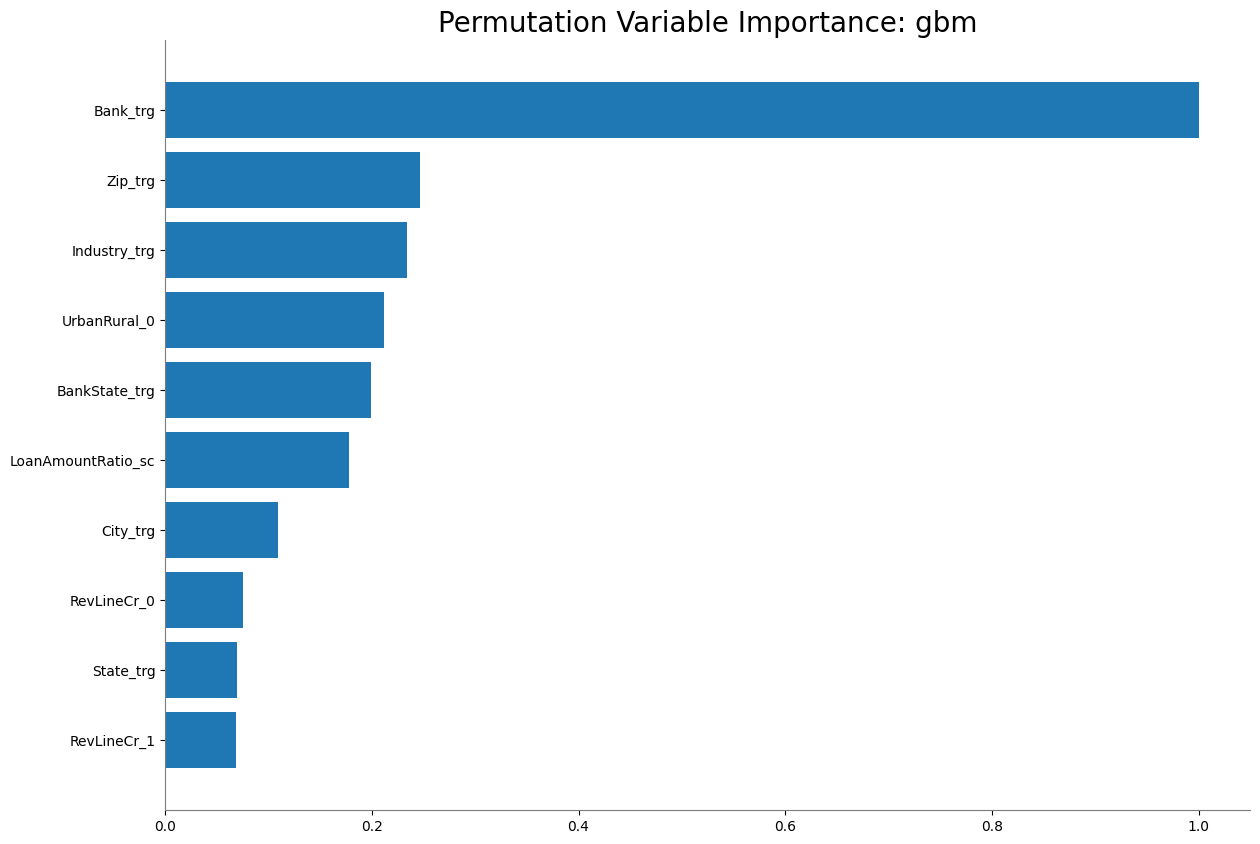

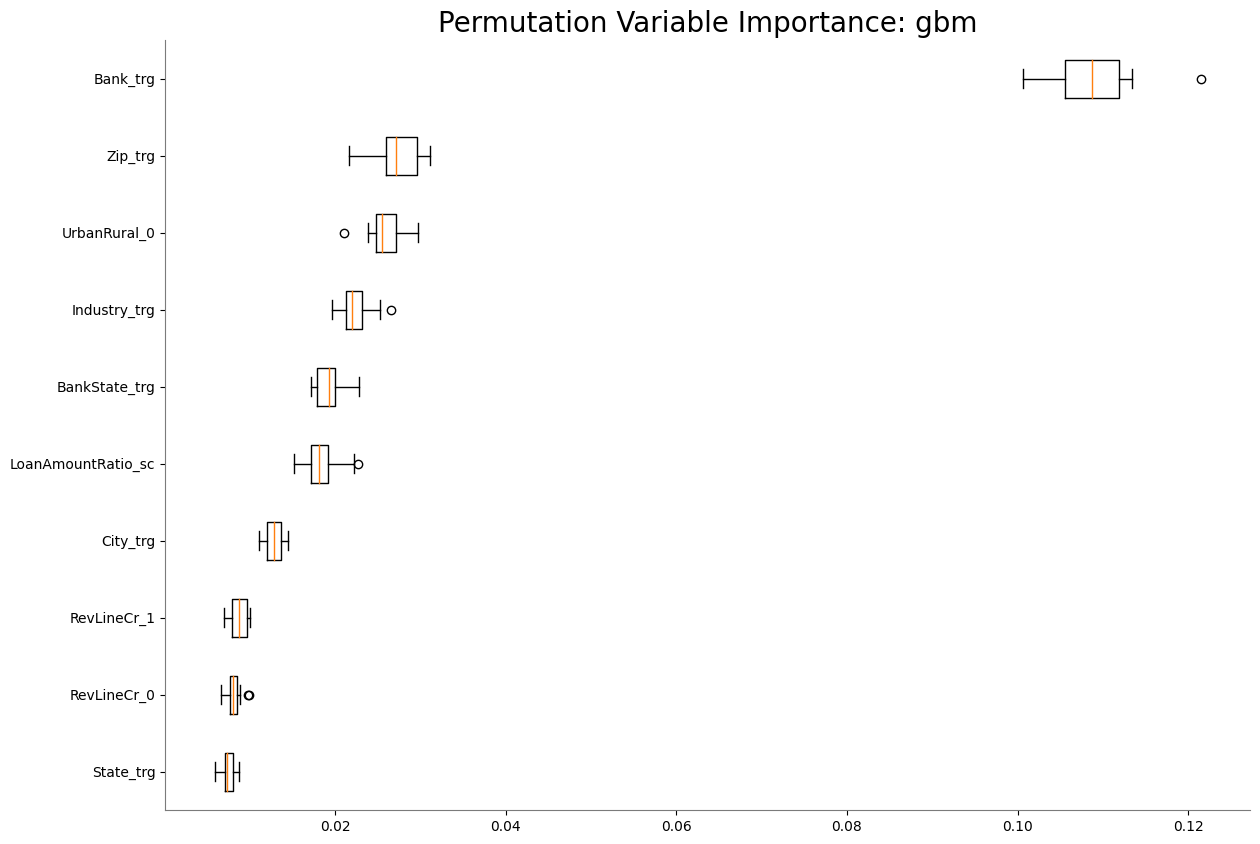

Variable,Run 1,Run 2,Run 3,Run 4,Run 5,Run 6,Run 7,Run 8,Run 9,Run 10,Run 11,Run 12,Run 13,Run 14,Run 15
Bank_trg,0.1006689,0.1076446,0.1092599,0.1051460,0.1058582,0.1214840,0.1086751,0.1013473,0.1115608,0.1091354,0.1080517,0.1048816,0.1133953,0.1121983,0.1132575
UrbanRural_0,0.0244654,0.0279421,0.0255973,0.0250855,0.0253603,0.0286385,0.0210148,0.0245622,0.0297541,0.0264010,0.0296291,0.0254904,0.0238007,0.0257522,0.0254542
Zip_trg,0.0216049,0.0262726,0.0259796,0.0275023,0.0266055,0.0300179,0.0271334,0.0299949,0.0305937,0.0292504,0.0279893,0.0247255,0.0311383,0.0243653,0.0259833
Industry_trg,0.0197026,0.0252698,0.0230115,0.0265671,0.0219717,0.0232841,0.0236374,0.0218320,0.0196872,0.0202833,0.0225912,0.0229588,0.0220099,0.0216121,0.0208886
BankState_trg,0.0190571,0.0215751,0.0199756,0.0198999,0.0172623,0.0192977,0.0199868,0.0227976,0.0177840,0.0171989,0.0190504,0.0198662,0.0171430,0.0180806,0.0204340
LoanAmountRatio_sc,0.0184864,0.0201366,0.0168143,0.0227043,0.0221885,0.0181353,0.0174283,0.0183967,0.0160343,0.0179239,0.0158272,0.0151585,0.0193766,0.0190772,0.0176990
City_trg,0.0120702,0.0120215,0.0136808,0.0128135,0.0145036,0.0129535,0.0139482,0.0110710,0.0136462,0.0117390,0.0119332,0.0135042,0.0143212,0.0122426,0.0125718
RevLineCr_1,0.0098458,0.0077155,0.0095597,0.0100815,0.0087031,0.0087835,0.0087668,0.0096753,0.0094834,0.0100698,0.0069771,0.0084384,0.0079136,0.0071809,0.0078058
RevLineCr_0,0.0076021,0.0080316,0.0082831,0.0099643,0.0097526,0.0077086,0.0079873,0.0083026,0.0086341,0.0088146,0.0065767,0.0081914,0.0072653,0.0079040,0.0074081
State_trg,0.0072844,0.0077012,0.0069232,0.0087961,0.0073887,0.0085688,0.0081732,0.0070022,0.0076589,0.0058708,0.0070867,0.0072330,0.0070145,0.0080004,0.0082507


In [244]:
# calculate importance
permutation_varimp = gbm_best.permutation_importance(train, use_pandas=True)

# plot permutation importance (bar plot)
gbm_best.permutation_importance_plot(train)

# plot permutation importance (box plot)
gbm_best.permutation_importance_plot(train, n_repeats=15)

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_model_python_1683424268951_7550

,0,1,Error,Rate
0,346310.0,53424.0,0.1336,(53424.0/399734.0)
1,30480.0,54652.0,0.358,(30480.0/85132.0)
Total,376790.0,108076.0,0.173,(83904.0/484866.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

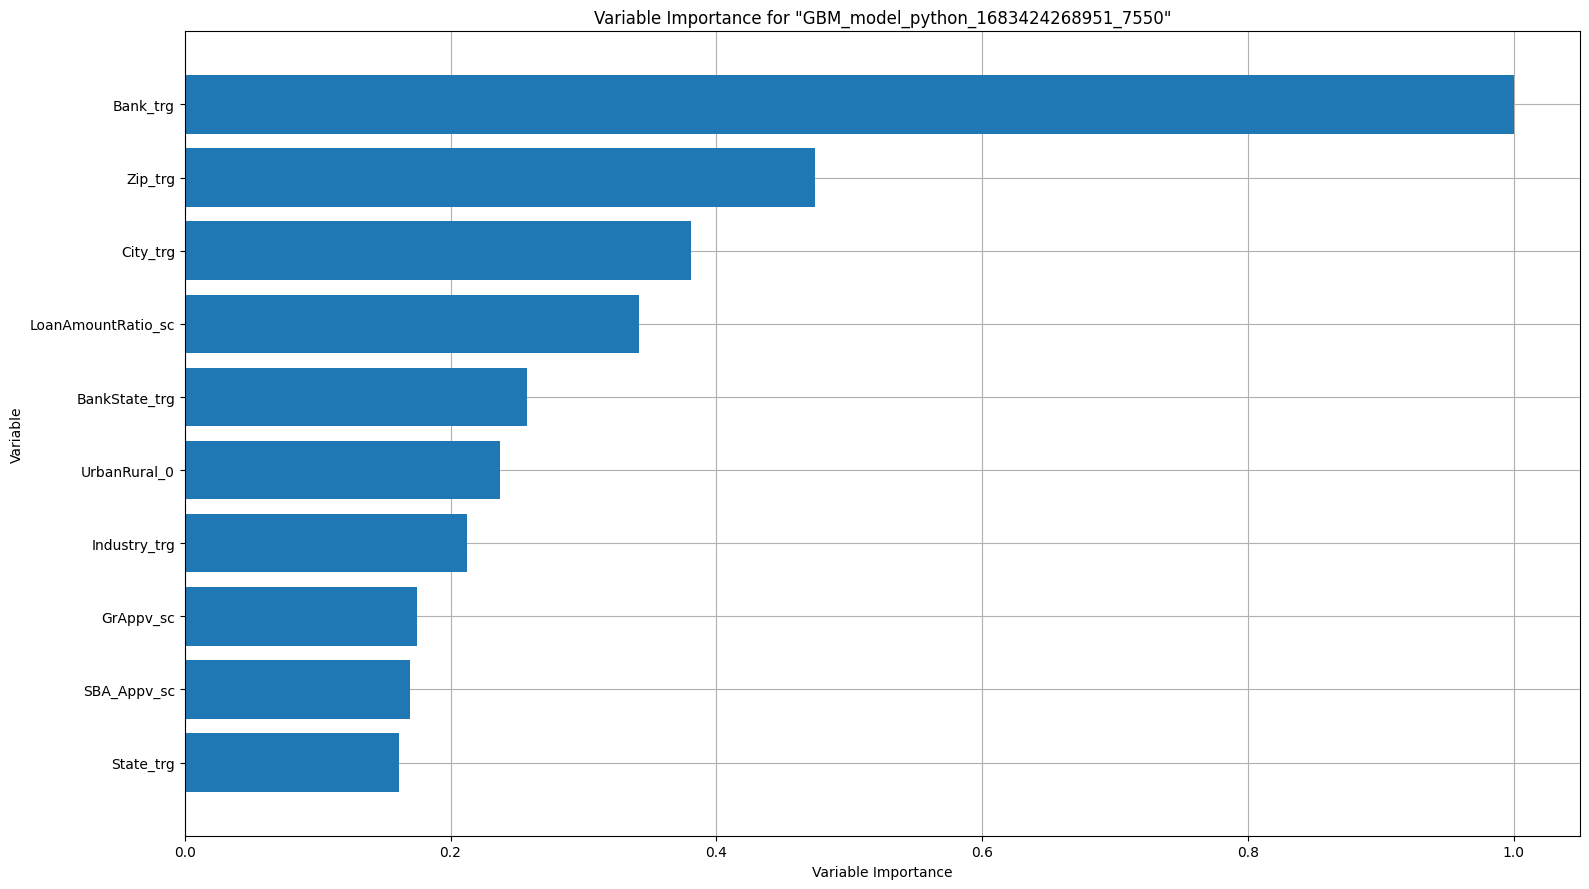

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

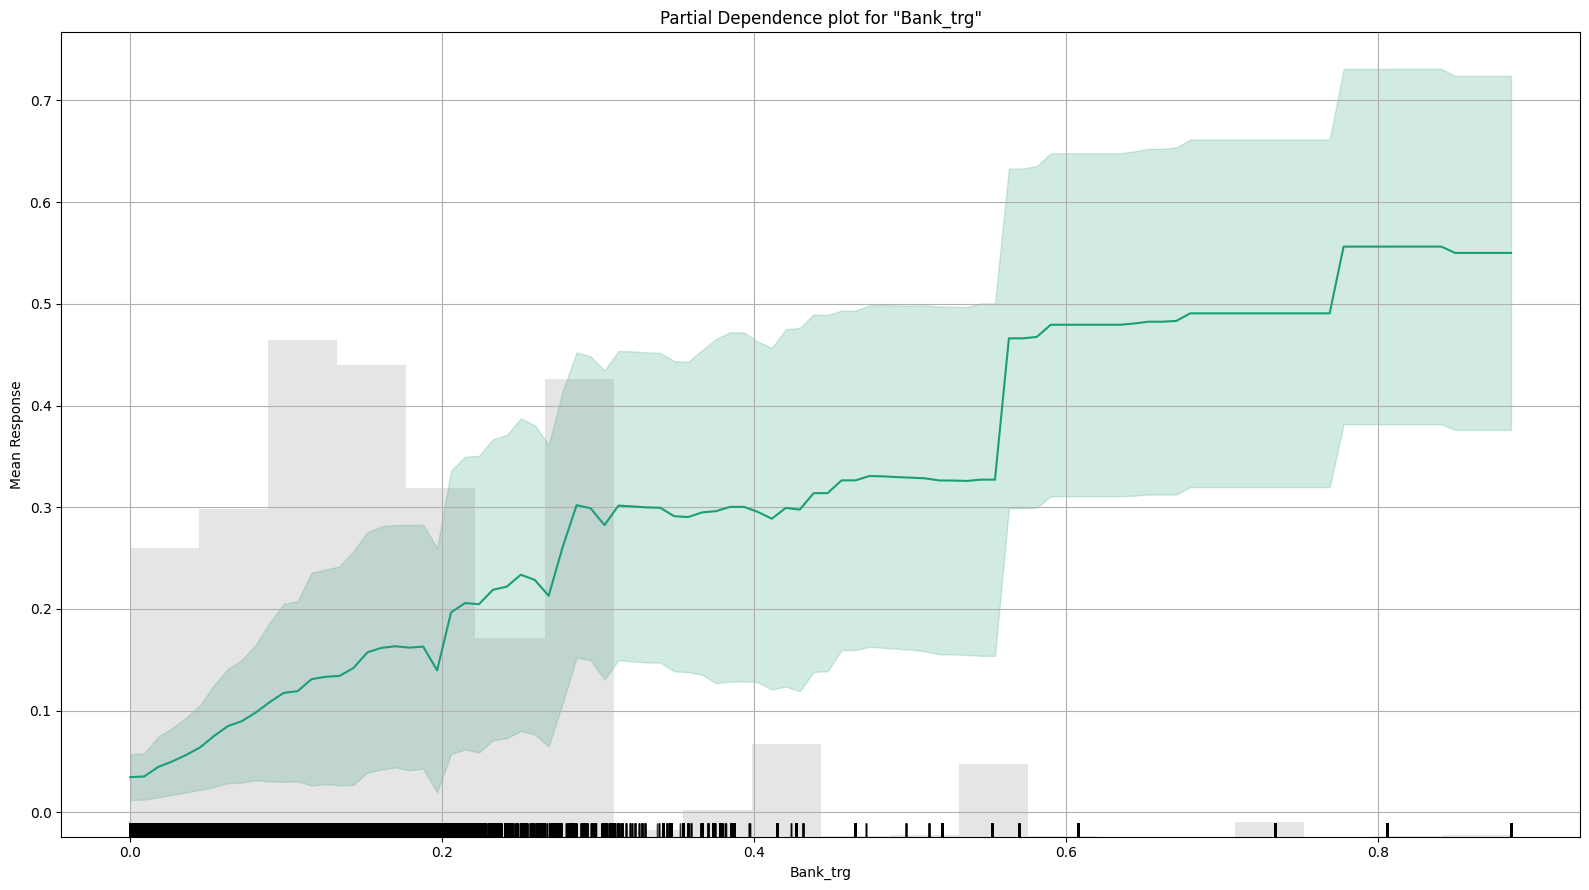

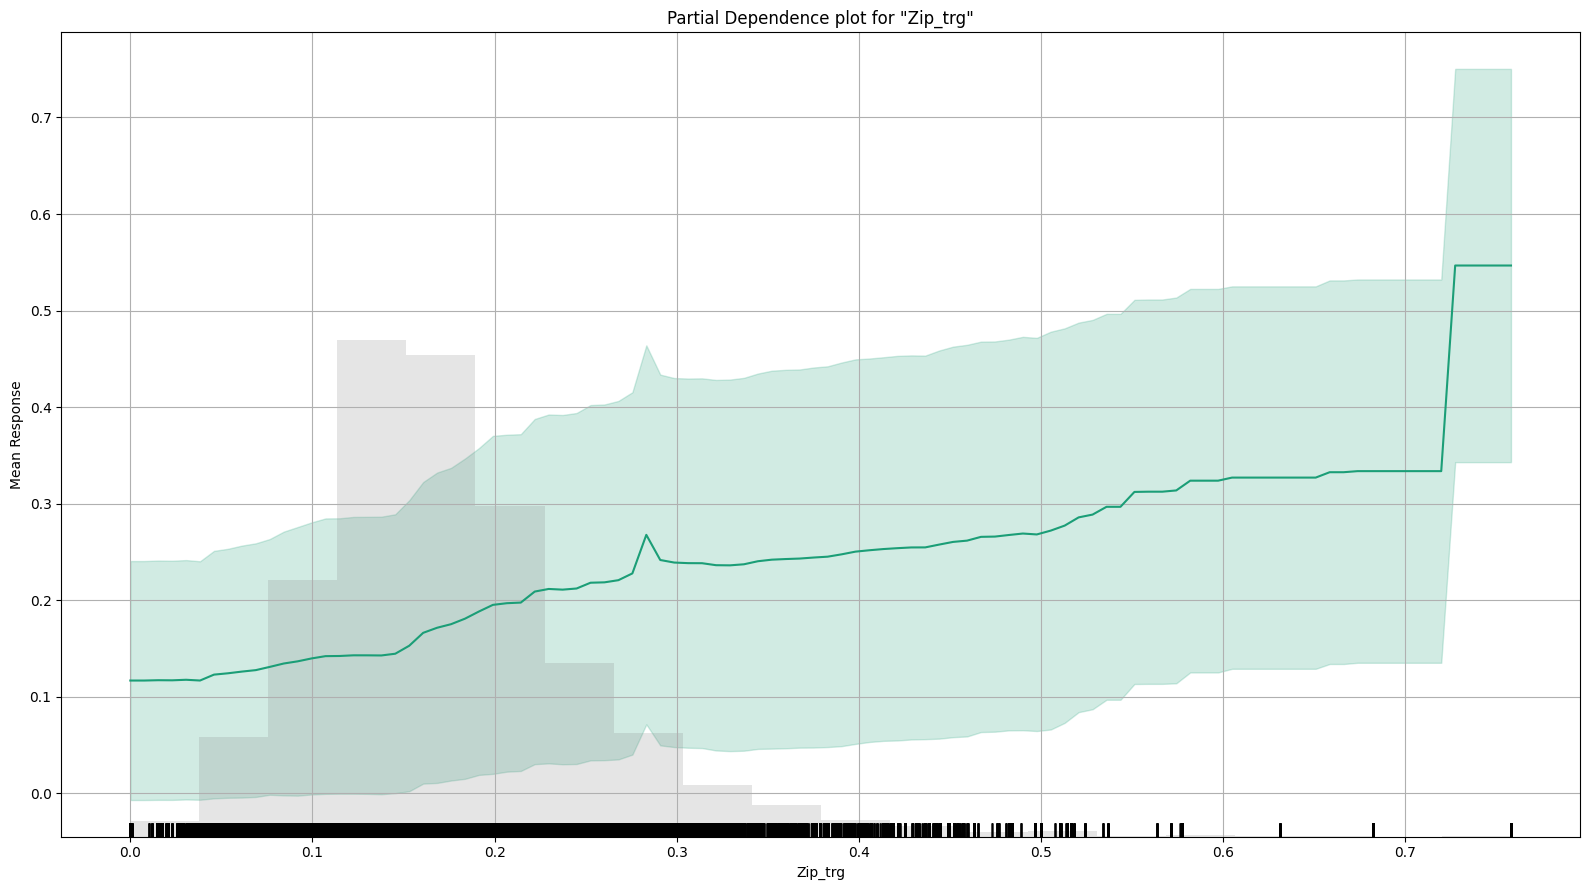

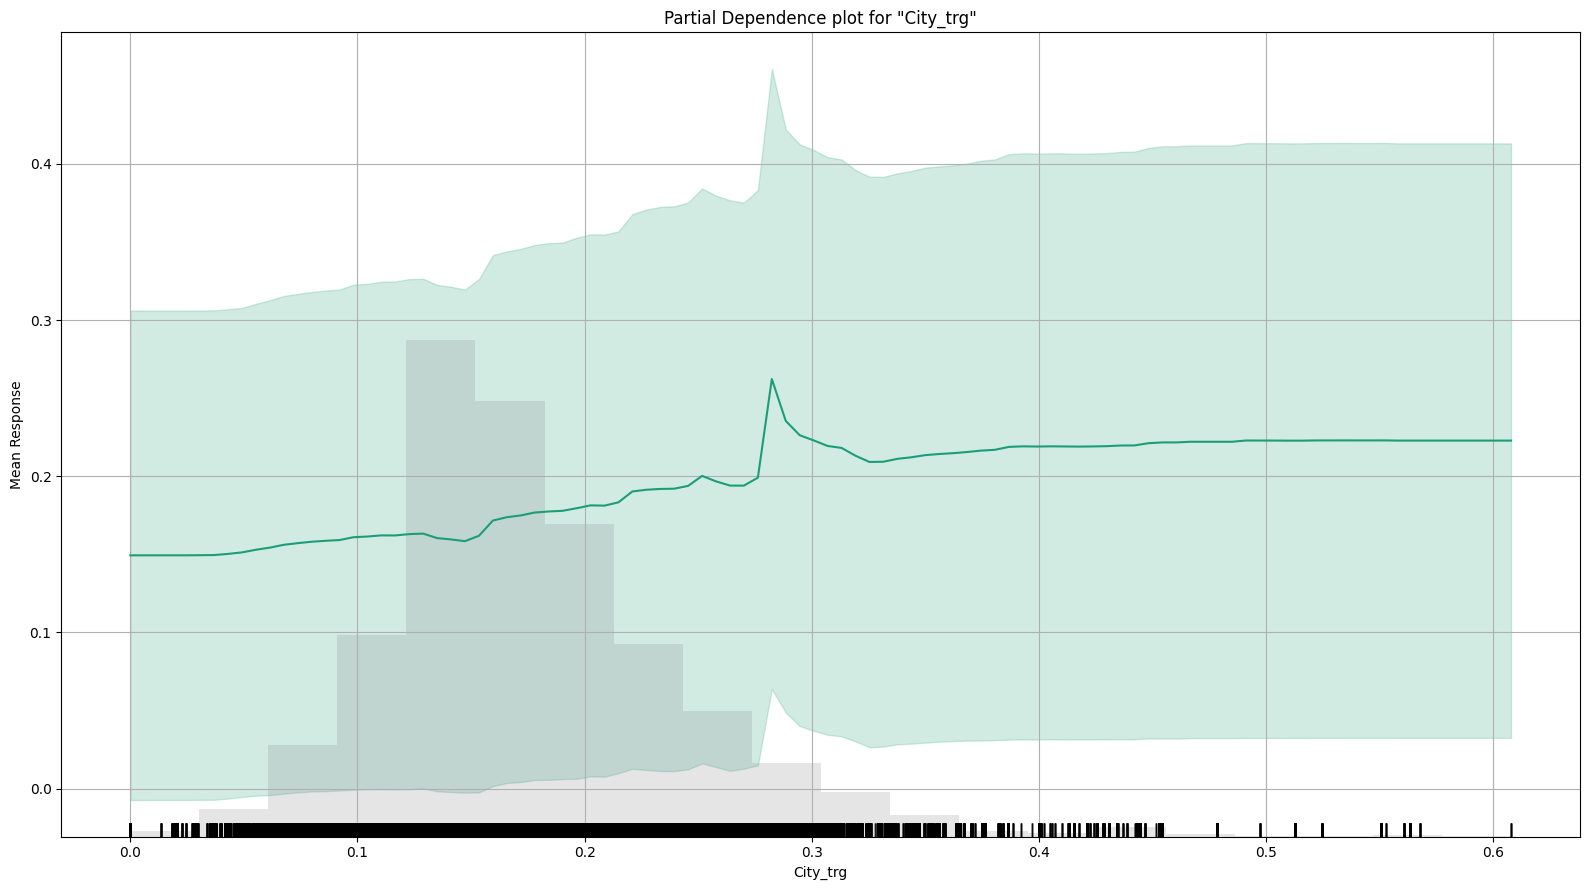

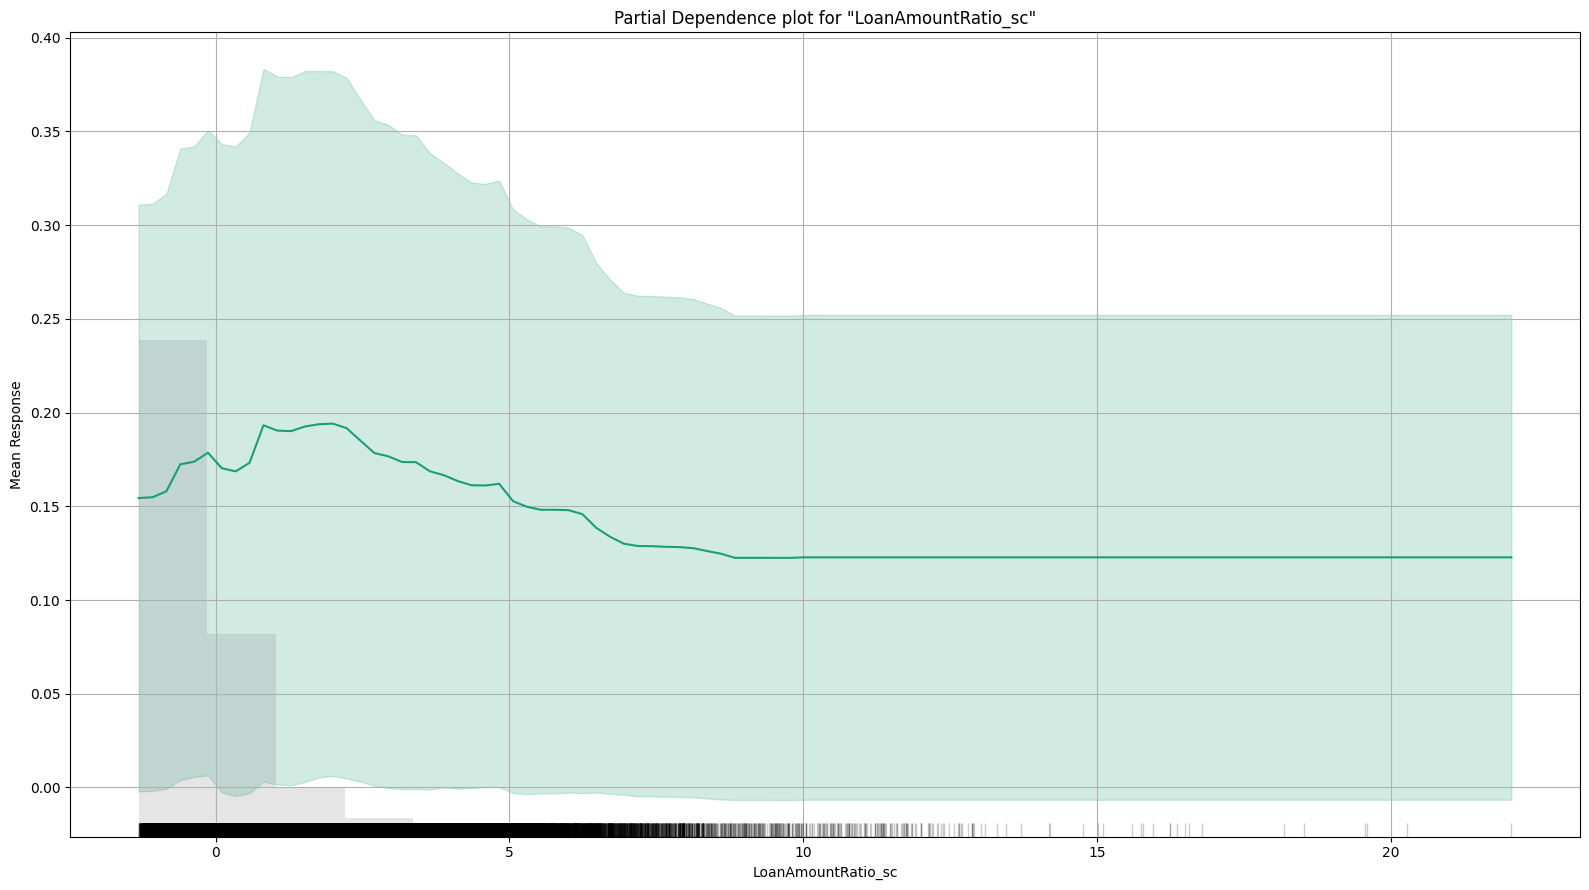

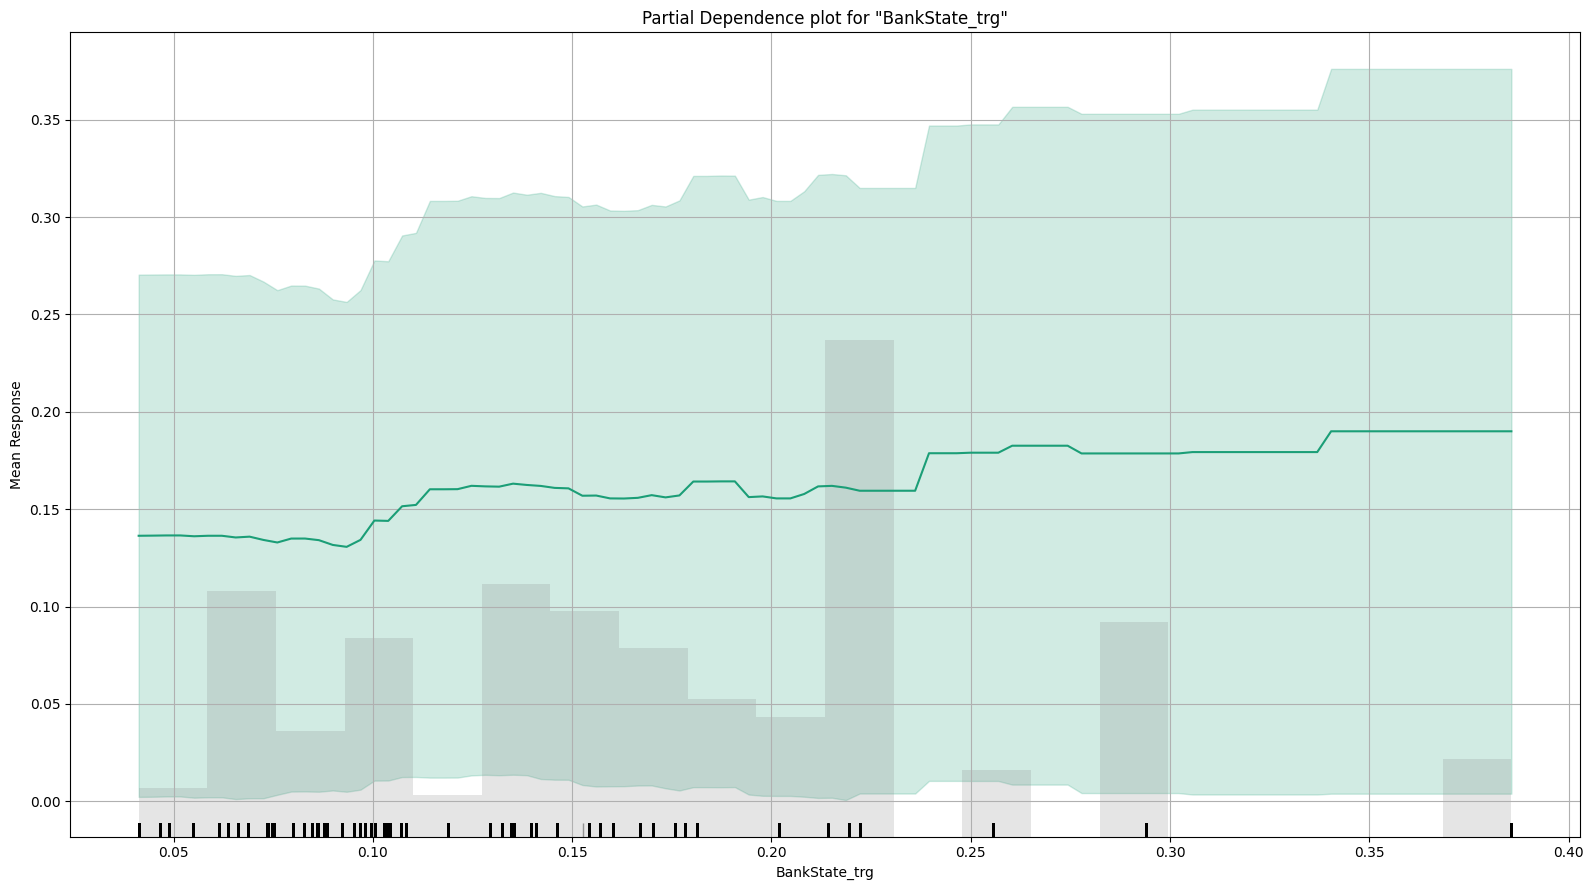

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_model_python_1683424268951_7550

,0,1,Error,Rate
0,346310.0,53424.0,0.1336,(53424.0/399734.0)
1,30480.0,54652.0,0.358,(30480.0/85132.0)
Total,376790.0,108076.0,0.173,(83904.0/484866.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [245]:
gbm_best.explain(train, exclude_explanations=["shap_summary"])

#### Partial Dependence Plot Interpretation

- From the plot for Bank_trg, we can see that it increases with the probability of being charged off. And certain points such as around 0.55 and 0.78 shows abrupt increase of probability. In this regard, we can assume that there can be a possibility that certain bank affects the probability strongly.

- From the plot for Zip_trg, we can it also increases in the same direction as the probability of being charged off. It also shows an abrupt increase around 0.7. In this regard, we can assume that there can be a possibility that certain region affects the probability strongly.

- The plot for City shows that there is an abrupt increase around 0.28 and it can potentially mean that certain city affects strongly the probability increase.

- The plot for LoanAmountRatio, we can see thatthe ration around 0.25 has the highest impact on the increase of the probability and the probability goes down from that point. That means, the companies that spent around 25% of the approved amount of loan tended to show higher probability of being charged off.

#### Strong/Weak points of the model
- The threshold for the best f1 score is lower than 0.5, so it has strict standard when it comes to predict the charged off probability. It is important to SBA loan since they need to strictly filter out the companies they should not provide the loan service. However, the model's precision is 38% and recall is 52% which means it tends to falsely predict the companies that got charged off as full in payment. This is can be a critical risk for the SBA loan organization since they might not be able to correctly select which companies to provide loan service. Also, some of the model's prediction shows the interpretation which is against the common sense with significant probability. I will ellaborate on this in the following part. 

#### Are there any scenarios (particular input data) that will require over-write model prediction? 
- In the individual analysis of shapely values that we will see below, it shows that if SBA_App and Gr_Appv are different, the probability of being charged off is getting down. Also, we can see that the LoanAmountRatio is pushing down the probabilty of being charged off. This means the more amount of loan the companies spend, the lower the probability of being charged off. However, it is against the common sense. If the amount of loan approved from SBA and general banks is same, the company has a consistency in evaluation, which can mean higher credit. Regarding the LoanAmountRatio, it also should be pushing up the risk of being charged off since the more money the companies spend, the higher the risk of being charged off gets. Thus, this model shows this limitations that might require over-write model prediction.

PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


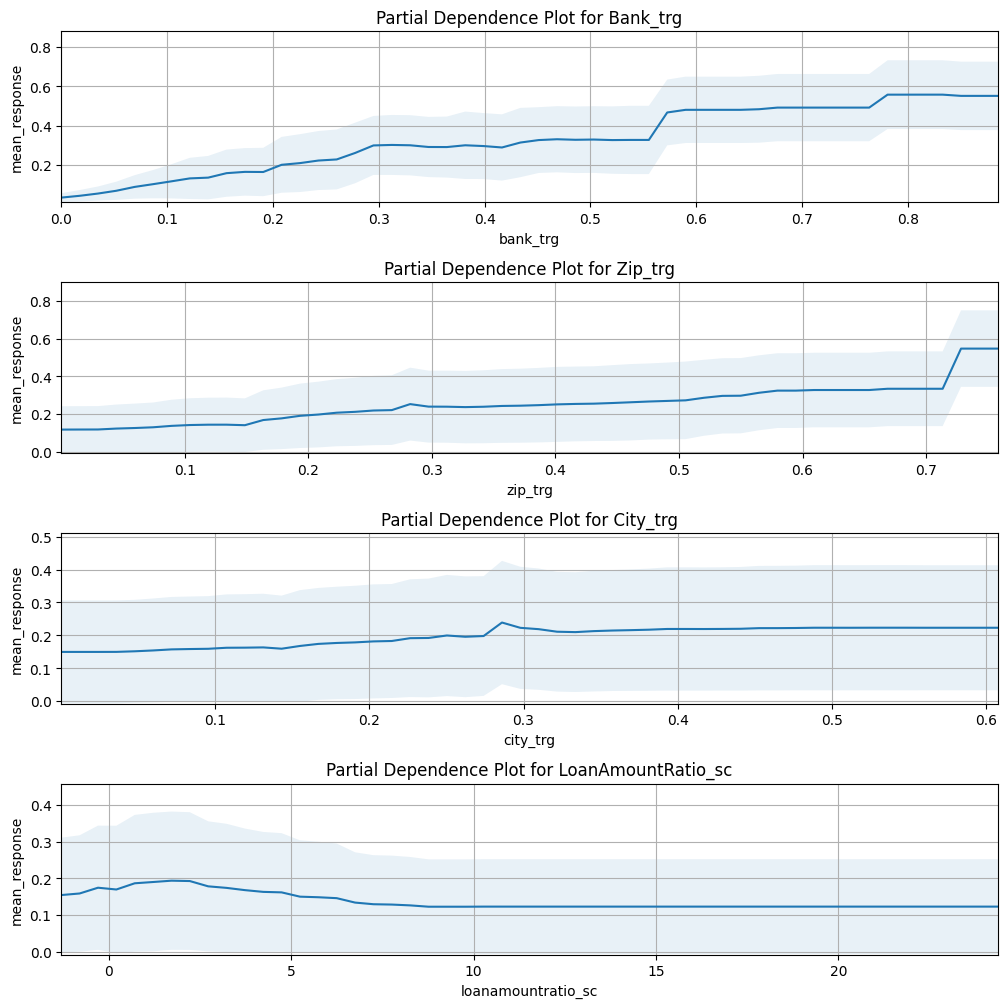

In [320]:
result = gbm_best.partial_plot(test, cols = ["Bank_trg",
                                              "Zip_trg",
                                              "City_trg","LoanAmountRatio_sc"], 
                                nbins=52,figsize=(10, 10));

### Calculating and displaying Shapley values for GBM model predictions

In [41]:
import shap

C:\Users\차유경\OneDrive\UTD\2023 Spring\Applied Machine Learning\ml-spring-2023\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [247]:
shapley_contribs = gbm_best.predict_contributions(train[0:50,:])
shapley_contribs = train[response][0:50,:].cbind(shapley_contribs)
shapley_contribs.head()

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


MIS_Status,NoEmp_sc,CreateJob_sc,RetainedJob_sc,DisbursementGross_sc,BalanceGross_sc,GrAppv_sc,SBA_Appv_sc,EmpGrowth_sc,LoanAmountRatio_sc,UrbanRural_0,UrbanRural_1,UrbanRural_2,RevLineCr_0,RevLineCr_1,RevLineCr_2,LowDoc_0,LowDoc_1,LowDoc_2,IsFranchise_0,IsFranchise_1,ZeroBal_0,ZeroBal_1,SBAGrAppv_0,SBAGrAppv_1,EntScale_Large,EntScale_Medium,EntScale_Small,GDPTopState_0,GDPTopState_1,SameState_0,SameState_1,LargeSBA_0,LargeSBA_1,BigBank_0,BigBank_1,City_trg,State_trg,Zip_trg,Bank_trg,BankState_trg,LoanInd_trg,Industry_trg,BiasTerm
0,0.00186358,-0.0079522,-0.0140655,0.00160198,0,-0.0215093,-0.000976032,-0.00487841,-0.0553167,-0.216162,-0.0510658,-0.0232375,0.0417277,0.00573022,0.0218908,0.0100989,0.00289648,-0.000848961,-0.00173243,-0.000498214,0,0,0.0509638,0.0398586,-1.44871e-06,0.000768666,0.00057438,0.0137001,0.0138042,0.0464451,0.0534381,-0.044776,-0.0390753,0.00673087,0.0140545,0.115668,-0.00229035,-0.284306,0.131561,0.0745514,-0.002617,-0.0575668,-1.92414
0,-0.0175361,-0.00564503,-0.0101188,0.0155312,0,0.00522229,-0.000539592,-0.00506208,0.00620536,-0.389818,-0.124921,-0.0220644,-0.0308438,0.0033559,-0.0262282,-0.0722397,-0.148987,-0.000506584,-0.000961772,-0.00378777,0,0,0.0324609,0.0253124,-1.04314e-06,0.00131638,0.00174022,0.00864549,0.0135164,0.0574274,0.0580602,0.00569382,0.0074475,0.0431378,0.0341892,-0.108565,0.0062162,-0.32463,0.263464,0.0060598,0.0115636,-0.140437,-1.92414
0,0.00654625,-0.00300788,0.00274049,0.0113906,0,-0.0430414,0.0045778,-0.0057773,-0.119119,0.0717993,0.0127567,-0.0143084,0.0194051,0.00840548,0.00358244,0.00850199,0.0113357,-0.00155791,-0.00309329,-0.00299838,0,0,0.0594169,0.0501997,-2.18384e-07,0.00275212,0.00288084,0.00639666,0.00457174,0.0403618,0.0290517,-0.0953407,-0.122868,0.000302604,0.00615038,-0.0168762,-0.025107,0.229965,-0.496246,-0.0162175,-0.00347644,-0.257395,-1.92414
1,0.0044642,-0.00736088,-0.00790415,-0.0270108,0,0.00194831,0.00510959,-0.00276137,-0.0473831,-0.332213,-0.120148,-0.0257255,-0.0185465,-0.00209935,-0.0139314,-0.0481718,-0.094185,-0.00201562,-0.000524036,-0.000945737,0,0,0.0241485,0.0215559,1.05728e-07,0.00170731,0.00184837,0.000948902,0.00014722,-0.0504025,-0.0515012,0.0057508,0.0116575,0.00594823,0.00781841,-0.0929117,0.0796067,-0.314026,-0.247955,-0.0264606,0.00775023,-0.0803568,-1.92414
0,0.00933303,-0.0102816,-0.0150412,-0.0420105,0,-0.0190203,-0.0144053,-0.00553436,-0.231398,0.110855,0.0329103,-0.00618867,0.061586,0.026618,0.00635413,0.00499453,0.0119007,-0.00147668,-0.00102169,-0.000559744,0,0,0.0146511,0.0205872,2.50328e-07,0.00124066,0.00311222,0.00493042,-0.00275672,-0.163903,-0.120878,0.013698,0.0171752,0.00207856,0.00642269,-0.0335494,0.0180961,0.189036,-0.434396,-0.135721,0.00641121,-0.101884,-1.92414
0,0.00426849,-0.00417565,0.0192803,-0.083159,0,-0.00148082,-0.0177268,-0.00203249,0.250134,0.242862,0.0511601,-0.0143492,-0.101373,-0.202085,-0.0219491,0.00427995,0.0119251,-0.000654938,0.000202936,0.000327098,0,0,0.0190184,0.0151217,-1.8367e-07,0.000493468,0.00108492,-0.00778395,-0.00893448,0.0507089,0.0709525,0.0181088,0.0234535,-0.0473062,-0.0464777,0.0869096,-0.0872489,0.16665,0.181338,0.107913,-0.00929773,-0.202884,-1.92414
1,0.00878144,-0.00518012,0.0101264,0.0417097,0,0.058666,0.0693478,-0.002489,-0.18219,0.250802,0.0726381,-0.0111166,0.11107,0.0553548,0.0331389,0.00665263,0.0179848,-0.000809549,0.000588529,0.00144014,0,0,0.024014,0.017361,-9.58582e-08,0.00181474,0.00279064,0.00146364,-0.00433775,0.0815836,0.0596732,0.026623,0.0283217,-0.0422019,-0.0307892,-0.0018501,-0.0360261,0.372663,0.39268,-0.0213594,0.0150393,0.0520816,-1.92414
0,0.00132028,-0.00656258,0.00648248,0.0170368,0,0.00141744,0.0030798,-0.0124781,0.0259669,0.141591,0.0526134,-0.00971949,-0.0315665,0.0216424,-0.00734161,0.00390799,0.0100752,-0.000702594,-0.00579841,-0.00486007,0,0,0.0424324,0.0274845,-3.44181e-07,0.000237867,0.0027938,0.0102547,0.0156564,0.0529311,0.0493193,-0.0963922,-0.139408,0.030356,0.0453455,-0.0218844,0.0143329,-0.312844,0.582549,0.053279,-0.00501395,0.161879,

In [248]:
# load JS visualization code to notebook
shap.initjs()

### Individual Analysis using Shapely values

In [57]:
gbm_best=h2o.load_model('gbm_best/GBM_model_python_1683424268951_7550')

In [7]:
y_pred_test=gbm_best.predict(test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [15]:
y_pred_frame=y_pred_test.as_data_frame()

In [19]:
y_true_frame=test['MIS_Status']

In [22]:
y_pred_frame['true']=y_true_frame.as_data_frame()

In [23]:
y_pred_frame

,predict,p0,p1,true
0,1,0.620947,0.379053,0
1,0,0.829615,0.170385,0
2,0,0.865210,0.134790,0
3,1,0.447058,0.552942,1
4,0,0.872323,0.127677,0
...,...,...,...,...
161182,0,0.856476,0.143524,0
161183,0,0.828238,0.171762,1
161184,0,0.994947,0.005053,0
161185,0,0.939914,0.060086,0


In [32]:
# pr tr
## 0 0
df_0_0=y_pred_frame[y_pred_frame['predict']==0]
df_0_0=df_0_0[df_0_0['true']==0]
df_0_0 = df_0_0[]    #.sort_values(by=['p0'],ascending=False)
## 0 1
df_0_1=y_pred_frame[y_pred_frame['predict']==0]
df_0_1=df_0_1[df_0_1['true']==1]
df_0_1 = df_0_1.sort_values(by=['p0'],ascending=False)
## 1 0 
df_1_0=y_pred_frame[y_pred_frame['predict']==1]
df_1_0=df_1_0[df_1_0['true']==0]
df_1_0 = df_1_0.sort_values(by=['p1'],ascending=False)
## 1 1
df_1_1=y_pred_frame[y_pred_frame['predict']==1]
df_1_1=df_1_1[df_1_1['true']==1]
df_1_1 = df_1_1.sort_values(by=['p1'],ascending=False)


In [38]:
test[df_0_0.index[0],:]

NoEmp_sc,CreateJob_sc,RetainedJob_sc,DisbursementGross_sc,BalanceGross_sc,GrAppv_sc,SBA_Appv_sc,EmpGrowth_sc,LoanAmountRatio_sc,UrbanRural_0,UrbanRural_1,UrbanRural_2,RevLineCr_0,RevLineCr_1,RevLineCr_2,LowDoc_0,LowDoc_1,LowDoc_2,IsFranchise_0,IsFranchise_1,ZeroBal_0,ZeroBal_1,SBAGrAppv_0,SBAGrAppv_1,EntScale_Large,EntScale_Medium,EntScale_Small,GDPTopState_0,GDPTopState_1,SameState_0,SameState_1,LargeSBA_0,LargeSBA_1,BigBank_0,BigBank_1,City_trg,State_trg,Zip_trg,Bank_trg,BankState_trg,LoanInd_trg,Industry_trg,MIS_Status
0.419499,0.00589447,0.0790885,0.0932496,-0.00237693,0.124561,0.344015,-0.0710127,-0.616486,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0.129909,0.188251,0.213583,0.00158367,0.139779,0.177241,0.0838237,0


In [53]:
# The function is to calculate Shapley values (contributions) and plot them for single record
def examine_indiv_reason_codes(record, model, use_matplotlib=True):
    
   # record = h2o.H2OFrame(record)
    
    shap_contribs = model.predict_contributions(record)
    
    col_mapping = {}
    for i in record.col_names: 
        related_cols = [x for x in shap_contribs.col_names if "{}.".format(i) in x]
        if len(related_cols) > 0:
            col_mapping[i] = related_cols
            
    for k, v in col_mapping.items():
        if len(v) > 1:
            shap_contribs[k] = shap_contribs[v].sum(axis=1,return_frame=True)
            shap_contribs = shap_contribs.drop(v)
        
    shap_cols = [i for i in shap_contribs.col_names if i != "BiasTerm"]
    bias_term = shap_contribs.as_data_frame()["BiasTerm"].values
    X = record.as_data_frame(use_pandas=True)
    shap_contribs = shap_contribs.as_data_frame(use_pandas=True)
    
    return shap.force_plot(bias_term, 
                           shap_contribs[shap_cols].values, 
                           X[shap_cols].values, 
                           shap_cols,
                           link="identity",
                           matplotlib=use_matplotlib
                          )

#### Prediction = 0, True = 0

In the plot below, the most influential feature is Bank_trg and it is pushing down the probability of being charged off. The next powerful feature is SBAGrAppv_0 which means if the amount of SBA_App and Gr_Appv are different, the probability of being charged off is getting down.

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


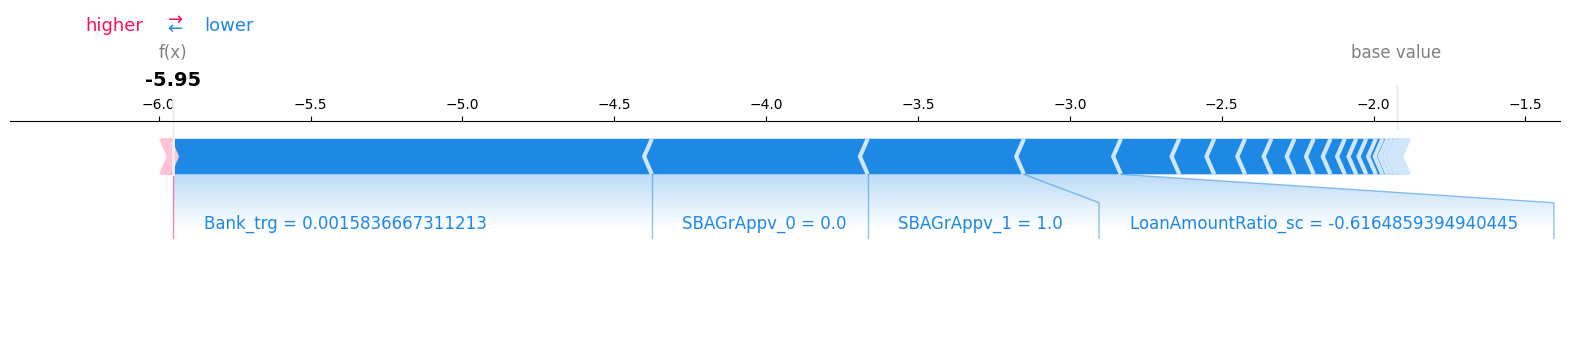

In [55]:
#The non matplotlib version produces better graphics but cannot be saved with notebook
examine_indiv_reason_codes(test[df_0_0.index[0],:], gbm_best, use_matplotlib=True)

In the plot below, the most influential feature is Bank_trg and it is pushing down the probability of being charged off. The next powerful feature is SBAGrAppv_0 which means if the amount of SBA_App and Gr_Appv are different, the probability of being charged off is getting down. We can also see that the LoanAmountRatio is pushing down the probabilty of being charged off. This means the more amount of loan the companies spend, the lower the probability of being charged off.

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


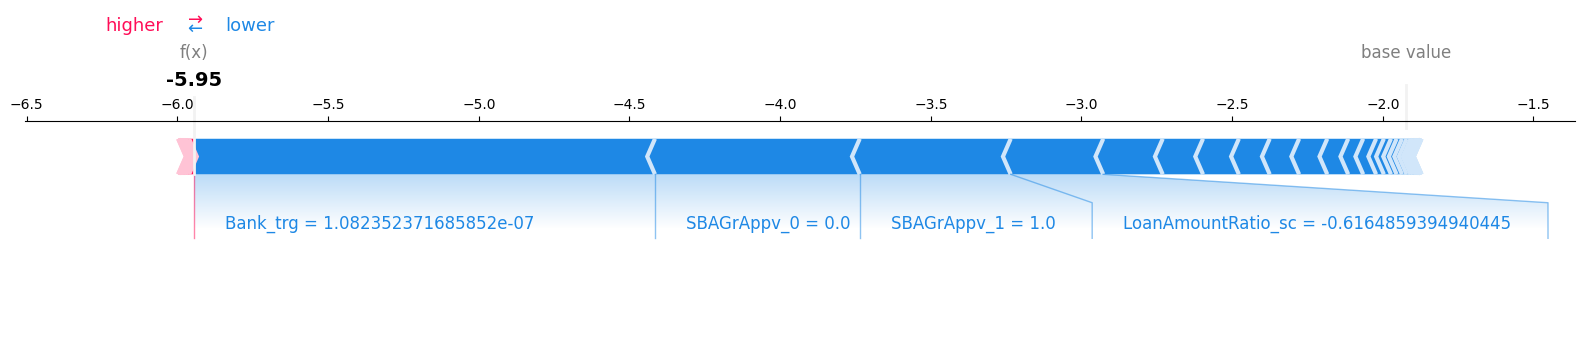

In [54]:
examine_indiv_reason_codes(test[df_0_0.index[1],:], gbm_best, use_matplotlib=True)

#### Prediction=0, True = 1

In the plot below, the most influential feature is Bank_trg and it is pushing down the probability of being charged off. The next powerful feature is SBAGrAppv_0 which means if the amount of SBA_App and Gr_Appv are different, the probability of being charged off is getting down.


contributions progress: |████████████████████████████████████████████████████████| (done) 100%


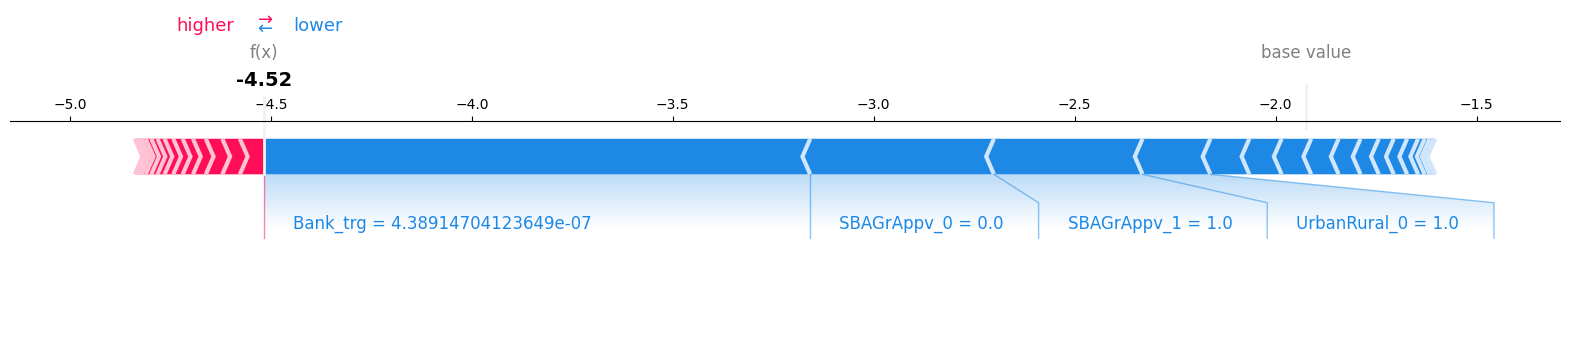

In [56]:
examine_indiv_reason_codes(test[df_0_1.index[0],:], gbm_best, use_matplotlib=True)

In the plot below, the most influential feature is Bank_trg and it is pushing down the probability of being charged off. The next powerful feature is Industry_trg and it is also pushing down the probability of being charged off.

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


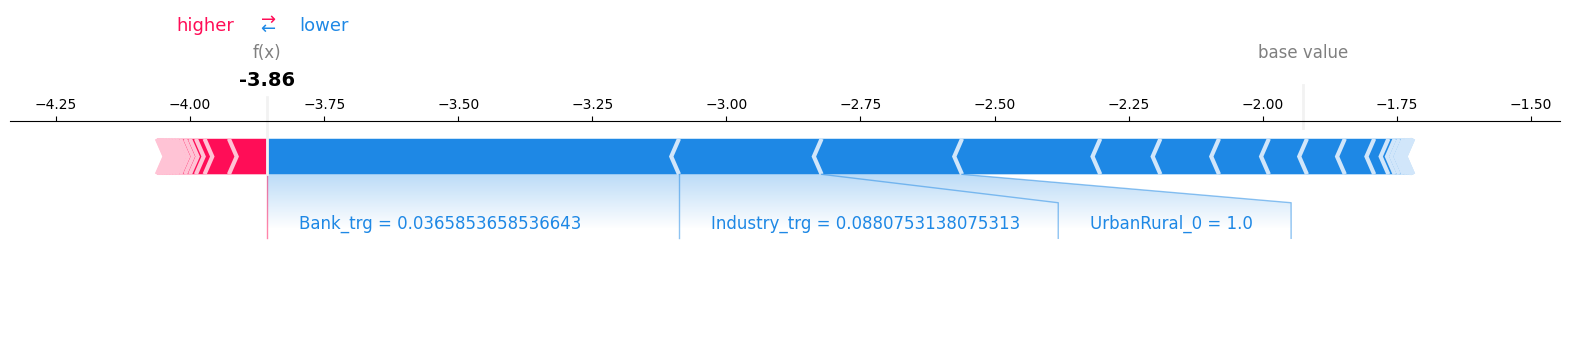

In [57]:
examine_indiv_reason_codes(test[df_0_1.index[1],:], gbm_best, use_matplotlib=True)

#### Prediction=1, True = 0

In the plot below, the most influential feature is Bank_trg and it is pushing up the probability of being charged off. Since we saw that the bank is also can be a factor that pushes down the probability, there is a possibility that according to the specific type of bank, the charged off probability significantly influenced.

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


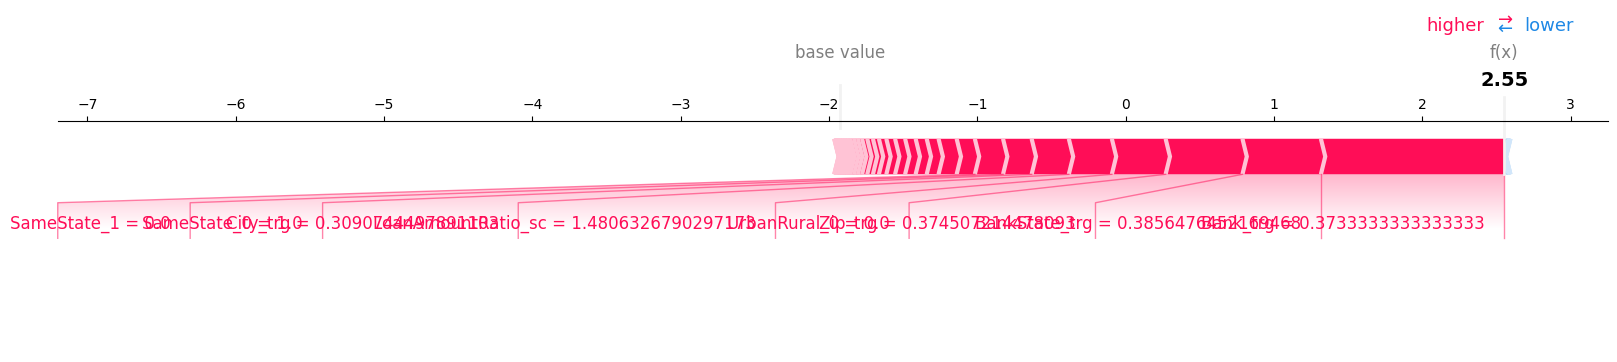

In [58]:
examine_indiv_reason_codes(test[df_1_0.index[0],:], gbm_best, use_matplotlib=True)

In the plot below, the most influential feature is Bank_trg and it is pushing up the probability of being charged off. Since we saw that the bank is also can be a factor that pushes down the probability, there is a possibility that according to the specific type of bank, the charged off probability significantly influenced.

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


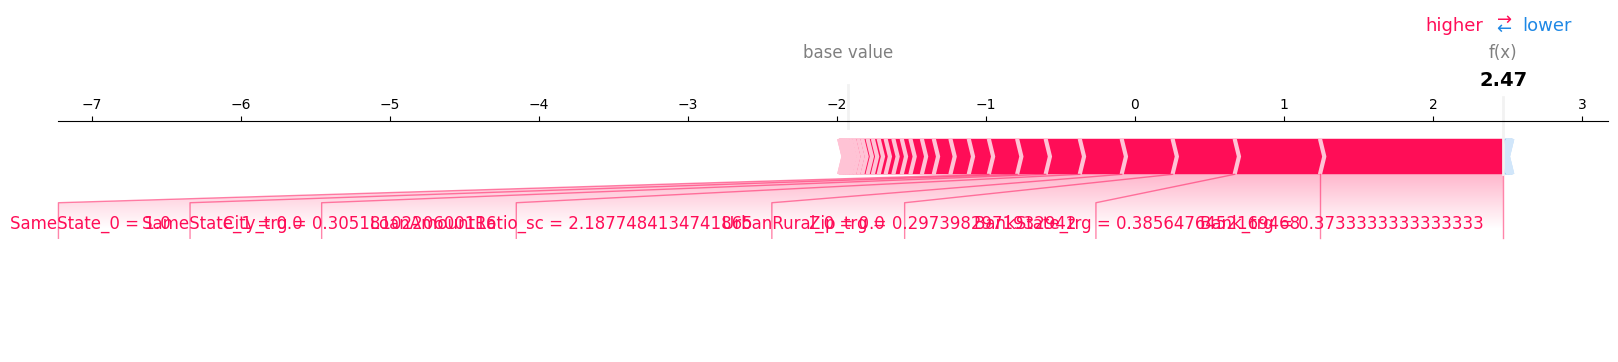

In [59]:
examine_indiv_reason_codes(test[df_1_0.index[1],:], gbm_best, use_matplotlib=True)

#### Prediction=1, True = 1

In the plot below, the most influential two feature is features are Bank and Zip. The interpretation for bank is as same as the former graph, and from the variable zip, we can see that the region also affects the probability. Especially when the model predict 1 as 1.

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


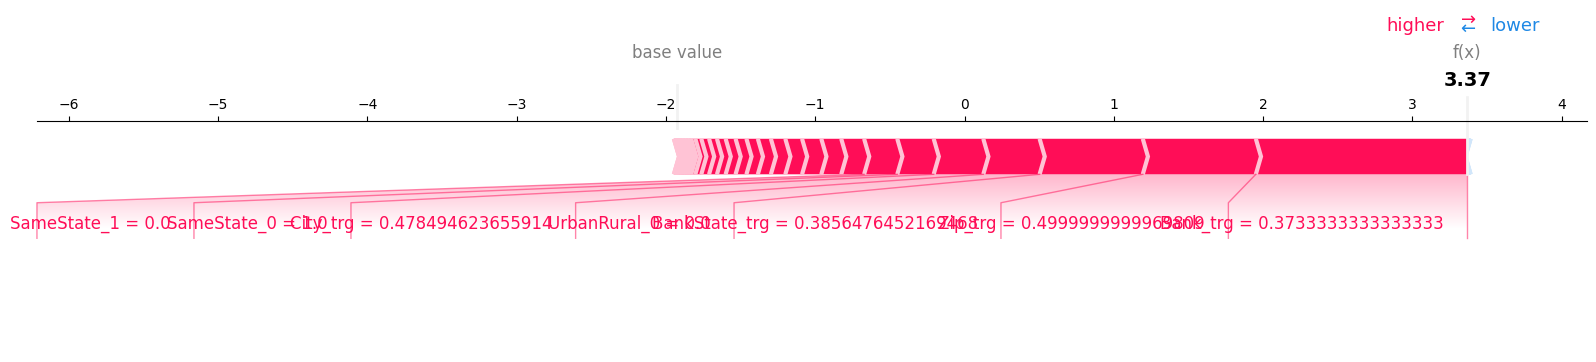

In [60]:
examine_indiv_reason_codes(test[df_1_1.index[0],:], gbm_best, use_matplotlib=True)

In the plot below, the most influential two feature is features are Bank and City. The interpretation for bank is as same as the former graph, and from the variable city, we can see that the region also affects the probability. Especially when the model predict 1 as 1.

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


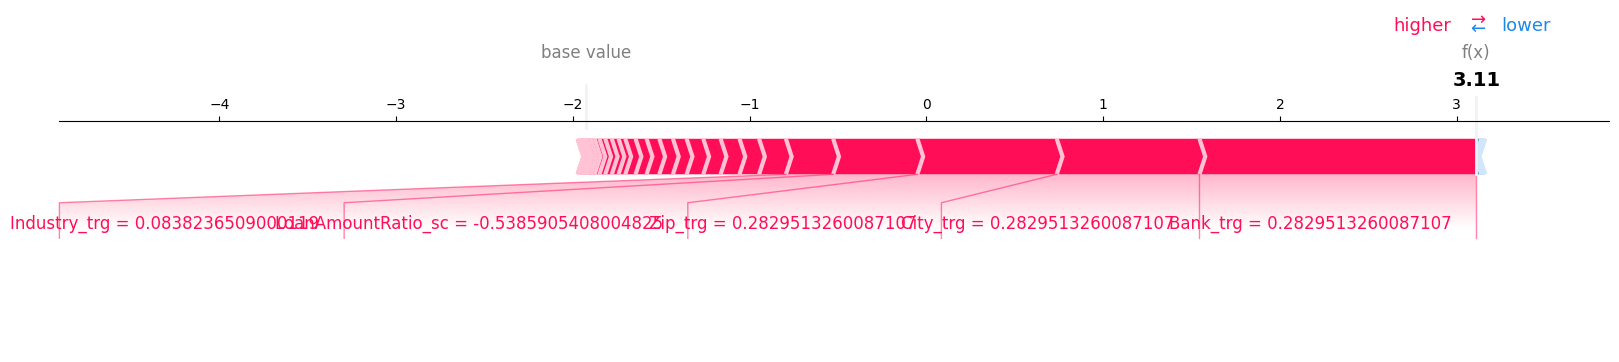

In [61]:
examine_indiv_reason_codes(test[df_1_1.index[1],:], gbm_best, use_matplotlib=True)

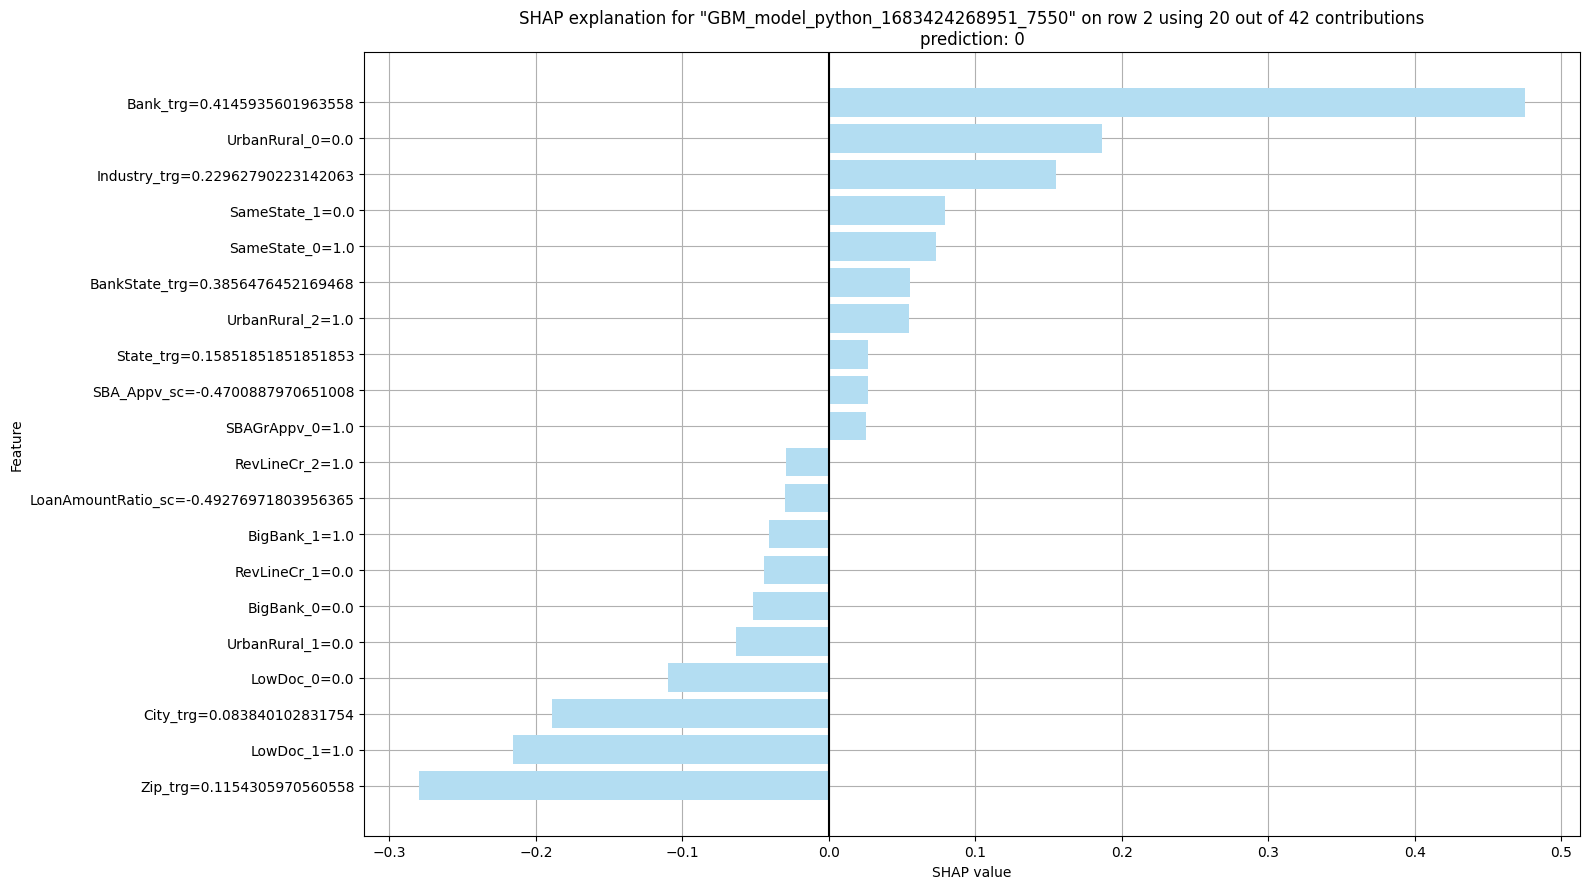

In [62]:
# Using H2O method
gbm_best.shap_explain_row_plot(test, row_index=2)

<AxesSubplot: title={'center': 'Bank_trg'}, xlabel='[MIS_Status]'>

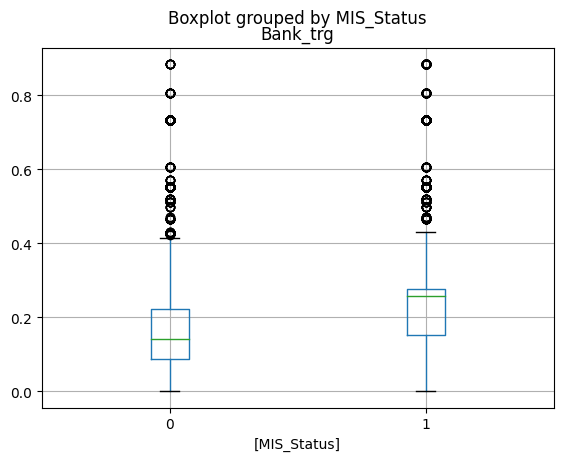

In [67]:
test[["Bank_trg",response]].as_data_frame(use_pandas=True).boxplot(by=response)

In [64]:
# The function is to calculate Shapley values (contributions) and plot them for multiple records
def examine_all_reason_codes(data, model):
    
    shap_contribs = model.predict_contributions(data)
    
    col_mapping = {}
    for i in data.col_names: 
        related_cols = [x for x in shap_contribs.col_names if "{}.".format(i) in x]
        if len(related_cols) > 0:
            col_mapping[i] = related_cols
            
    for k, v in col_mapping.items():
        if len(v) > 1:
            shap_contribs[k] = shap_contribs[v].sum(axis=1,return_frame=True)
            shap_contribs = shap_contribs.drop(v)
        
    shap_cols = [i for i in shap_contribs.col_names if i != "BiasTerm"]
    bias_term = shap_contribs.as_data_frame()["BiasTerm"].values
    X = data.as_data_frame(use_pandas=True)
    shap_contribs = shap_contribs.as_data_frame(use_pandas=True)
    
    return shap.summary_plot(shap_contribs[shap_cols].values, 
                             X[shap_cols].values,
                             feature_names=shap_cols
                            )

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


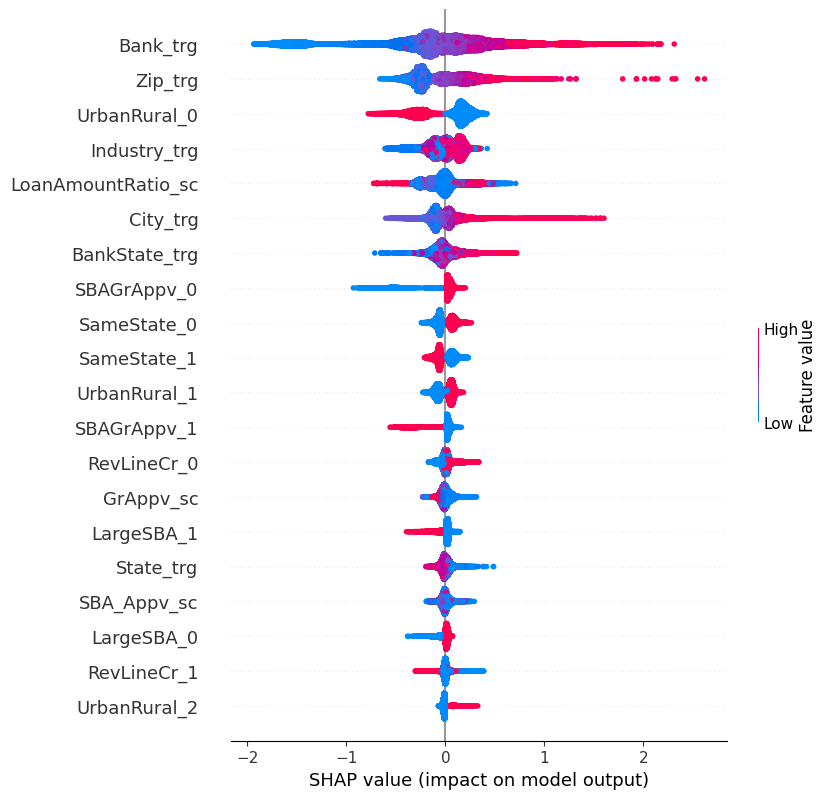

In [65]:
examine_all_reason_codes(test[0:50000,:], gbm_best)

## Save all artifacts

Save all artifacts needed for scoring function:
- Trained model
- Encoders

You should restart your Kernel to properly test scoring function

In [59]:
# Save the GBM model
h2o.save_model(model=gbm_best, path="D:\AML\Project2\gbm_best")

'D:\\AML\\Project2\\gbm_best\\GBM_model_python_1683424268951_7550'

In [101]:
# Encoders & Other artifacts

artifacts_dict = {
    "num_scalers": num_scalers,  #done
    "cat_encoders": cat_encoders,  # done
    'continuous_columns': numerical_var,  #done
    "te_encoders": target_encoder,   #don3
    "ohe_columns": OHE_columns,   #done
    "te_columns": TE_columns,    #done
    "columns_to_train": X_train_trg.columns, #done 
    "threshold": 0.24462386191717797  #done
}
with open('artifact_dict.pkl','wb')as f:
    pickle.dump(artifacts_dict,f) 
    